# GPU Check

In [1]:
import tensorflow as tf
import time

# Check if a GPU is available
print("Available device:", tf.config.list_physical_devices('GPU'))

# Perform an intensive operation
start = time.time()
a = tf.random.normal([10000, 10000])
b = tf.matmul(a, a)
print("GPU computation time:", time.time() - start)

Available device: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU computation time: 0.8129086494445801


#Import Libraries

In [2]:
import os
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from sklearn.model_selection import train_test_split

In [3]:
# Import the device_lib module from TensorFlow to check available hardware devices
from tensorflow.python.client import device_lib
# List and print all available devices (CPU, GPU, etc.) on the system
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11653557809393302728
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14619377664
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2723098803865704398
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


#Set the Directory

In [4]:
# Import the drive module from Google Colab to access Google Drive
from google.colab import drive
# Mount Google Drive to the specified directory in Colab
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import sys  # Import the sys module to access system-specific parameters and functions
# Add a specific directory to the system path
sys.path.append('/content/drive/Shareddrives/AI Project 2024_2025/AI Project 2024_2025/OUR HANDS')

In [6]:
# Define the path to the new directory
new_directory = '/content/drive/Shareddrives/AI Project 2024_2025/AI Project 2024_2025/OUR HANDS'
# Check if the specified directory exists
if os.path.exists(new_directory):
    os.chdir(new_directory) # If the directory exists, change the current working directory to the new directory
    print("Current Dir:", os.getcwd())  # Print the current working directory to confirm the change
else:
    print("Non existing dir:", new_directory) # If the directory does not exist, print a message

Current Dir: /content/drive/Shareddrives/AI Project 2024_2025/AI Project 2024_2025/OUR HANDS


In [7]:
# Define the path to the training dataset directory
train_dir = '/content/drive/Shareddrives/AI Project 2024_2025/AI Project 2024_2025/OUR HANDS/asl_alphabet_train'
# Define the path to the test dataset directory
test_dir = '/content/drive/Shareddrives/AI Project 2024_2025/AI Project 2024_2025/OUR HANDS/asl_alphabet_test'

# Load Images and Reshaping

In [8]:
# List of class labels
classes = ['D', 'H', 'K', 'S', 'X']

def get_data(data_dir):
    # Initialize empty lists to store images and labels
    images = []
    labels = []

    # Get the list of directories inside the data directory (representing different classes)
    dir_list = os.listdir(data_dir)
    for i in range(len(dir_list)):
        print("Obtaining images of", dir_list[i], "...")
        sub_dir = os.path.join(data_dir, dir_list[i])  # Full path of the subdirectory (class folder)

        # Check if the path is indeed a directory (i.e., it contains images)
        if os.path.isdir(sub_dir):
            # Iterate through each file in the directory (should be image files)
            for image in os.listdir(sub_dir):
                img_path = os.path.join(sub_dir, image)  # Full path of the image
                img = cv2.imread(img_path)  # Read the image using OpenCV

                if img is not None:  # Check if the image was read successfully
                    img = cv2.resize(img, (32, 32))  # Resize image to 32x32 pixels
                    img = np.reshape(img, (32, 32, 3))  # Reshape the image to (32, 32, 3) for color channels
                    images.append(img)  # Append the image to the images list

                    # Get the class index from the directory name
                    class_index = classes.index(dir_list[i])
                    labels.append(class_index)  # Append the corresponding class label to labels list

    return images, labels  # Return the list of images and labels

# Call the function to get the data from the specified training directory
X, y = get_data(train_dir)  # Replace `train_dir` with the actual directory path
print(f"Loaded {len(X)} images with {len(set(y))} unique labels.")

Obtaining images of D ...
Obtaining images of H ...
Obtaining images of K ...
Obtaining images of X ...
Obtaining images of S ...
Loaded 10093 images with 5 unique labels.


In [9]:
# print Pictures and Labels
print("Number of Images:", len(X))
print("Number of Labels:", len(y))

Number of Images: 10093
Number of Labels: 10093


# Data Visualization

In [10]:
# List of classes in the ASL (American Sign Language) alphabet
classes = ['D', 'H', 'K','X', 'S']

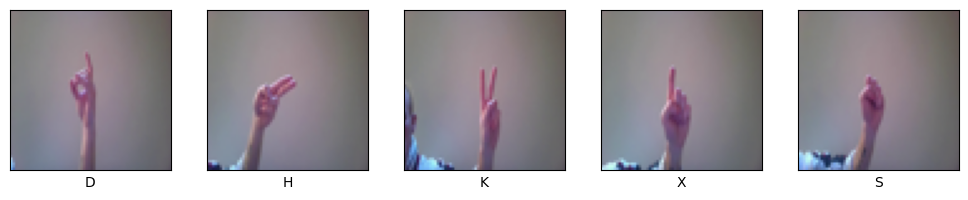

In [11]:
def plot_sample_images():
    # Create a figure to hold the subplots
    plt.figure(figsize=(10, 2))  # Adjust the figure size (width = 10, height = 2) to fit 5 images

    # Loop over the 5 labels/classes
    for i in range(5):
        # Create a subplot (1 row, 5 columns, i+1 to place images in each column)
        plt.subplot(1, 5, i + 1)
        plt.xticks([])  # Remove x-axis tick marks
        plt.yticks([])  # Remove y-axis tick marks

        # Load a sample image for the current class
        # The image path assumes a naming format like: "D_1.png", "H_1.png", etc.
        path = os.path.join(train_dir, classes[i], f"{classes[i]}_1.png")
        img = plt.imread(path)  # Read the image using matplotlib
        plt.imshow(img)  # Display the image
        plt.xlabel(classes[i])  # Label the image with the class name

    # Adjust layout so that the images are spaced properly
    plt.tight_layout()
    plt.show()  # Show the plot with the 5 images

# Call the function to display the sample images
plot_sample_images()

# Data Preprocessing: Normalization and One-Hot Encoding

In [12]:
def preprocess_data(X, y):
    np_X = np.array(X)  # Convert X to a NumPy array
    normalised_X = np_X.astype('float32') / 255.0  # Normalize the images by dividing by 255

    label_encoded_y = utils.to_categorical(y)  # One-hot encode the labels

    # Split the dataset into training (90%) and testing (10%) sets
    x_train, x_test, y_train, y_test = train_test_split(
        normalised_X, label_encoded_y, test_size=0.1  # No random_state specified
    )

    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = preprocess_data(X, y)

In [13]:
# Print the shapes of the training and test data
print("Training data:", x_train.shape)
print("Test data:", x_test.shape)

Training data: (9083, 32, 32, 3)
Test data: (1010, 32, 32, 3)


# Train CNN

In [14]:
classes = 5  # Total number of letters and symbols
batch = 32  # Batch dimension (16, 32, 64)
epochs = 30  # Number of epochs (50, 100, 30, 40)
learning_rate = 0.001  # Learning rate (0.01, 0.005, 0.001)

In [15]:
adam = Adam(learning_rate) #Use the Adam optimizer to update the model's weights during training.

In [16]:
# Import EarlyStopping callback from Keras
from tensorflow.keras.callbacks import EarlyStopping

# Callback to stop training in case of loss stagnation
early_stop = EarlyStopping(
    monitor='val_loss',          # Monitor the validation loss during training
    patience=5,                  # Number of epochs with no improvement before stopping
    restore_best_weights=True,   # Restore model weights from the epoch with the best value of the monitored quantity
    verbose=1                     # Display messages when stopping
)

# The following is a commented-out version of the ReduceLROnPlateau callback.
# It can be used if needed, but it's currently inactive.

# from tensorflow.keras.callbacks import ReduceLROnPlateau

# Callback to reduce learning rate in case of loss stagnation
# reduce_lr = ReduceLROnPlateau(
#     monitor='val_loss',         # Monitor the validation loss
#     factor=0.2,                 # Factor by which the learning rate will be reduced
#     patience=3,                 # Number of epochs with no improvement before reducing LR
#     min_lr=0.0001,              # Minimum learning rate
#     verbose=1                   # Display messages when learning rate is reduced
# )

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import AveragePooling2D

model = Sequential()  # Creates a sequential model, which is a linear stack of layers

# Add the input layer as the first layer
model.add(Input(shape=(32, 32, 3)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Conv2D(64, (3, 3)): Adds a convolutional layer with 64 filters of size 3x3.
# padding='same': Keeps the output dimensions the same as the input dimensions.
# activation='relu': Uses the ReLU (Rectified Linear Unit) activation function.
model.add(AveragePooling2D(pool_size=(2, 2)))  # Reduces the spatial dimensions of the output (downsampling) by taking the maximum value in each 2x2 window.
model.add(BatchNormalization())  # Normalizes the output of the previous layer to improve stability and training speed.

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
# Conv2D(128, (3, 3)): Adds a convolutional layer with 128 filters of size 3x3.
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))  # Dropout(0.3): Randomly deactivates 30% of the neurons during training to prevent overfitting.

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
# Conv2D(256, (3, 3)): Adds a convolutional layer with 256 filters of size 3x3.
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())  # Flatten(): Converts the 3D output of the convolutional layers into a 1D vector for input into the dense (fully connected) layers.
model.add(Dropout(0.3))  # Higher dropout rate reduces overfitting.
model.add(Dense(1024, activation='relu'))
# Dense(1024): Adds a dense layer with 1024 neurons.
# activation='relu': Uses the ReLU activation function.
model.add(Dense(classes, activation='softmax'))
# Dense(classes): Adds a dense layer with a number of neurons equal to the number of classes.
# activation='softmax': Uses the softmax activation function to produce a probability distribution across the classes.

#Network architecture

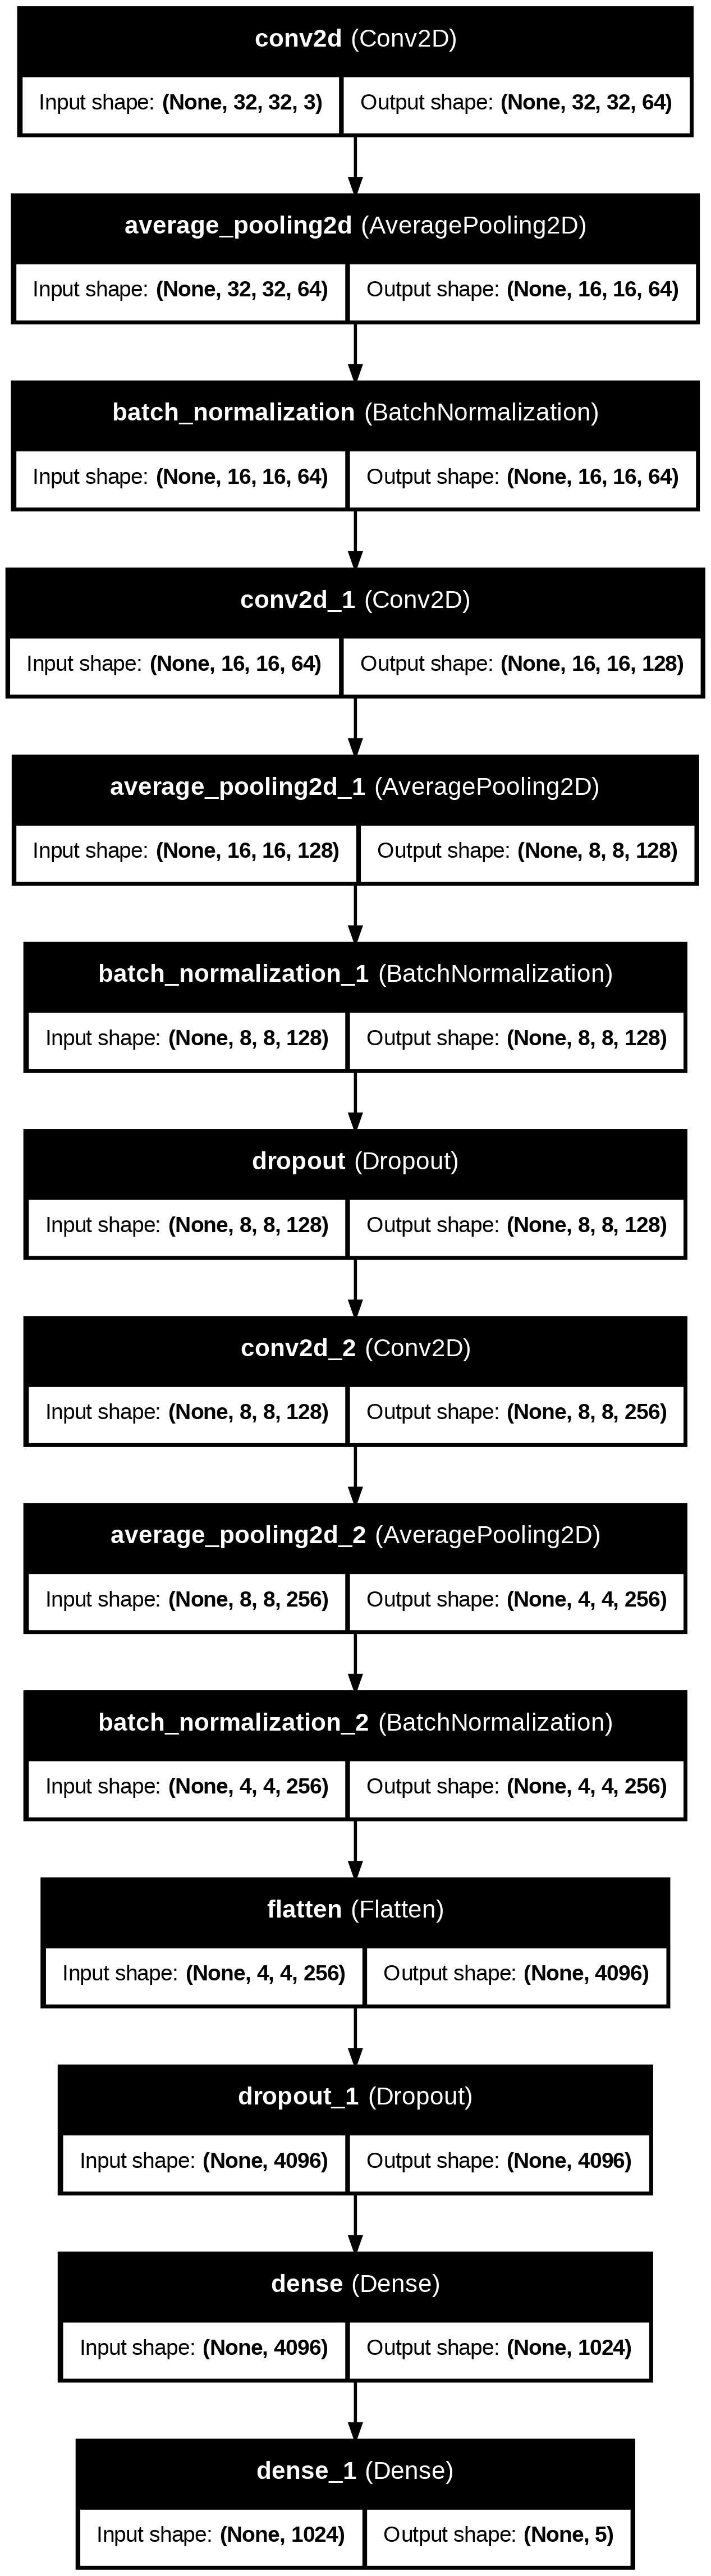

In [18]:
from tensorflow.keras.utils import plot_model

# Generate a plot of the model architecture and save it to a file named 'model_V1.png'
# 'show_shapes=True' will display the shape of the output tensor for each layer
# 'show_layer_names=True' will display the names of the layers in the model
plot_model(model, to_file='model_V1.png', show_shapes=True, show_layer_names=True)

# Model Compile


In [19]:
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
# Use the Adam optimizer to update the model's weights during training.
# The Adam optimizer is an adaptive learning rate optimization algorithm that is widely used in deep learning for faster convergence.

# loss='categorical_crossentropy': Specifies the loss function to use.
# 'categorical_crossentropy' is commonly used for multi-class classification problems, where the target labels are one-hot encoded.
# This function calculates the difference between the predicted probability distribution and the actual labels, and the goal is to minimize this difference during training.

# metrics=['accuracy']: Specifies that accuracy will be used as the metric to evaluate the model's performance.
# During training and evaluation, the model's accuracy (the percentage of correct predictions) will be tracked and reported.

In [20]:
model.summary()
# The command model.summary() in Keras provides a detailed description of the model's architecture.
# It prints the following details about each layer in the model:
# Layer (type): The name and type of the layer (e.g., Conv2D, Dense).
# Output Shape: The shape of the output data after the layer processes the input. This indicates how the dimensions of the data change after the layer.
# Param #: The number of trainable parameters in each layer. These are the weights and biases that will be adjusted during training.
# Total params: The total number of parameters across all layers in the model. This includes both trainable and non-trainable parameters.
# Trainable params: The number of parameters that can be updated during training. These are the parameters the model will learn during the training process.
# Non-trainable params: The number of parameters that will not be updated during training. These are parameters that have been frozen or set to not be adjusted.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 8, 8, 128)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 4, 4, 256)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       4,195,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           5,125 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,573,061 (17.44 MB)

 Trainable params: 4,572,165 (17.44 MB)

 Non-trainable params: 896 (3.50 KB)

#Data Augumentation

In [21]:
# Importing the ImageDataGenerator class from Keras to perform image augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Creating an ImageDataGenerator instance to apply various augmentations to the training data
datagen = ImageDataGenerator(
    rotation_range=10,        # Random rotation of images within a 10 degree range
    width_shift_range=0.2,    # Random horizontal shift of up to 20% of the image width
    height_shift_range=0.2,   # Random vertical shift of up to 20% of the image height
    brightness_range=[1, 1],  # No change in brightness (can be adjusted if needed)
    zoom_range=0.5,           # Random zoom up to 50%
    horizontal_flip=True,     # Randomly flip images horizontally
    fill_mode='nearest',      # Fill any missing pixels using the nearest pixel value
    validation_split=0.2      # 20% of the data will be used for validation
)

# Creating the training data generator to apply the transformations to the training data
train_generator = datagen.flow(
    x_train, y_train,         # Training data and corresponding labels
    batch_size=batch,         # Batch size for each iteration
    subset='training',        # Use the 'training' subset (80% of data)
    shuffle=True              # Shuffle the data during training
)

# Creating the validation data generator to apply the transformations to the validation data
val_generator = datagen.flow(
    x_train, y_train,         # Validation data and corresponding labels (from x_train, y_train)
    batch_size=batch,         # Batch size for each iteration
    subset='validation'       # Use the 'validation' subset (20% of data)
)

Example of batch values (before and after augmentation):
Original (before):  14.0 186.0
Augmented (after):  9 132


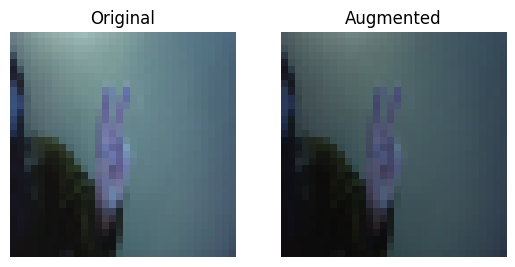

In [22]:
# Denormalize the images by multiplying by 255 (assuming original values were scaled between 0 and 1)
x_train_denormalized = x_train * 255.0

# Create a new ImageDataGenerator with a brightness range to apply brightness variation during testing
datagen = ImageDataGenerator(brightness_range=[0.7, 1.3])  # Modify the brightness to a range between 70% and 130%

# Select a single image (the first image from the dataset) to see the effect of the brightness augmentation
image = x_train_denormalized[0:1]  # Take only the first image (since it's a batch of one)

# Use the ImageDataGenerator to apply the brightness augmentation to the selected image
augmented_image = next(datagen.flow(image, batch_size=1))

# Denormalize the augmented image to ensure it falls within the valid range of pixel values (0 to 255)
augmented_image_denormalized = np.clip(augmented_image, 0, 255)  # Clip any values outside the valid range
augmented_image_denormalized = augmented_image_denormalized.astype(np.uint8)  # Convert the values to unsigned 8-bit integers

# Display the minimum and maximum pixel values of the original and augmented images to observe the change
print("Example of batch values (before and after augmentation):")
print("Original (before): ", np.min(image), np.max(image))  # Print the min and max pixel values of the original image
print("Augmented (after): ", np.min(augmented_image_denormalized), np.max(augmented_image_denormalized))  # After augmentation

# Visualize the original and augmented images side by side for comparison
plt.subplot(1, 2, 1)  # Set up the subplot for the original image
plt.title("Original")  # Set the title of the first image
plt.imshow(image[0].astype(np.uint8))  # Display the original image (converted to uint8 for proper display)
plt.axis('off')  # Hide the axis

plt.subplot(1, 2, 2)  # Set up the subplot for the augmented image
plt.title("Augmented")  # Set the title of the augmented image
plt.imshow(augmented_image_denormalized[0])  # Display the augmented image
plt.axis('off')  # Hide the axis

plt.show()  # Show the images

In [23]:
# Set the batch size for data generation
batch_size = batch

# Denormalize the x_train data by multiplying by 255 (assuming original values were scaled between 0 and 1)
x_train_denormalized = x_train * 255.0

# Create an ImageDataGenerator instance with various augmentations
datagen = ImageDataGenerator(
    rotation_range=10,        # Apply random rotations up to 10 degrees
    width_shift_range=0.2,    # Apply random horizontal shifts (up to 20% of the image width)
    height_shift_range=0.2,   # Apply random vertical shifts (up to 20% of the image height)
    brightness_range=[0.7, 1.3],  # Apply random brightness changes between 70% and 130%
    zoom_range=0.5,           # Apply random zoom (up to 50%)
    horizontal_flip=True,     # Randomly flip images horizontally
    fill_mode='nearest',      # Fill any missing pixels with the nearest value
    validation_split=0.2      # Split the data into 80% for training and 20% for validation
)

# Create a training data generator that applies the transformations and uses the denormalized x_train data
train_generator = datagen.flow(
    x_train_denormalized, y_train,  # Input denormalized data and corresponding labels
    batch_size=batch_size,          # Specify the batch size
    subset='training',              # Use the 'training' subset (80% of data)
    shuffle=True                    # Shuffle the data for training
)

# Create a validation data generator that applies the transformations and uses the denormalized x_train data
val_generator = datagen.flow(
    x_train_denormalized, y_train,  # Input denormalized data and corresponding labels
    batch_size=batch_size,          # Specify the batch size
    subset='validation'             # Use the 'validation' subset (20% of data)
)

# Optional function to denormalize a batch of images (converting values back to the range [0, 1])
def denormalize_batch(batch):
    return np.clip(batch * (1/255), 0, 1)  # Rescale pixel values back to the [0, 1] range

# Example usage: Iterate over batches from the training generator
for batch_images, batch_labels in train_generator:
    # Denormalize the batch before using it for training
    batch_images = denormalize_batch(batch_images)
    # Perform training or other operations here
    break  # Just an example, breaks after the first batch for demonstration

#Train the Classifier

##Without Data Augmentation

In [27]:
# Train the model using the training data (x_train and y_train)
history = model.fit(
    x_train, y_train,         # Training data and labels
    batch_size=batch,         # Number of samples per gradient update
    epochs=epochs,            # Number of times to iterate over the entire training data
    validation_split=0.2,     # Use 20% of the training data for validation (the rest for training)
    shuffle=True,             # Shuffle the training data before each epoch to prevent learning in sequence
    verbose=1                 # Set verbosity level to 1, which will show detailed information about each epoch
)
# Explanation of parameters:
# - validation_split: Reserves 20% of training data for validation to monitor performance.
# - shuffle: Ensures data is randomly shuffled before each epoch to prevent the model from memorizing the order.
# - verbose: Controls the level of output during training (1 = detailed output per epoch).

Epoch 1/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 1.0000 - loss: 1.6412e-07 - val_accuracy: 1.0000 - val_loss: 6.5608e-10
Epoch 2/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 1.0000 - loss: 1.8928e-07 - val_accuracy: 1.0000 - val_loss: 5.2486e-10
Epoch 3/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 1.0000 - loss: 1.1435e-05 - val_accuracy: 1.0000 - val_loss: 9.8412e-10
Epoch 4/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 1.0000 - loss: 9.0101e-07 - val_accuracy: 1.0000 - val_loss: 5.2486e-10
Epoch 5/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 1.0000 - loss: 6.5842e-08 - val_accuracy: 1.0000 - val_loss: 1.3122e-10
Epoch 6/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 8.6831e-08 - val_accuracy: 1.0000 - val_loss: 1.3122e-10
Epoch 7/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 1.0000 - loss: 6.0577e-07 - val_accuracy: 1.0000 - val_loss: 1.1809e-09
Epoch 8/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/s

##With Data Augmentation
###Re-execute to obtain the associated model and analyze the results obtained

In [ ]:
# Train the model using a data generator that applies data augmentation
history = model.fit(
    train_generator,         # Use the data augmentation generator for training (train_generator)
    epochs=epochs,           # Number of epochs to train the model
    verbose=1                # Display detailed progress during training (e.g., loss and accuracy per epoch)
)

Epoch 1/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9834 - loss: 0.0507
Epoch 2/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9824 - loss: 0.0505
Epoch 3/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9809 - loss: 0.0492
Epoch 4/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9825 - loss: 0.0564
Epoch 5/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9837 - loss: 0.0539
Epoch 6/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9841 - loss: 0.0424
Epoch 7/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9812 - loss: 0.0518
Epoch 8/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9845 - loss: 0.0475
Epoch 9/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9829 - loss: 0.0557
Epoch 10/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9869 - loss: 0.0372
Epoch 11/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9919 - loss: 0.0268
Epoch 12/30
228/228 ━━━━━━━━━━━━━━━━━━

# Evaluation Model

In [28]:
# Denormalize the x_test data by multiplying by 255 (assuming the original values were scaled between 0 and 1)
x_test_denormalized = x_test * 255.0

# Evaluate the model on the test data (denormalized x_test and corresponding y_test labels)
test_loss, test_acc = model.evaluate(x_test_denormalized, y_test)

# Print the test accuracy and test loss
print('Test Accuracy:', test_acc)  # Display the accuracy of the model on the test dataset
print('Test Loss:', test_loss)     # Display the loss value for the model on the test dataset

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2058 - loss: 2039793.0000
Test Accuracy: 0.2049504965543747
Test Loss: 2009958.25


In [29]:
# Evaluate the model on the training data (denormalized x_train and corresponding y_train labels)
train_loss, train_acc = model.evaluate(x_train_denormalized, y_train, verbose=0)
# Print the accuracy and loss on the training data
print(f"Training Accuracy: {train_acc:.4f}")  # Display the training accuracy, rounded to 4 decimal places
print(f"Training Loss: {train_loss:.4f}")     # Display the training loss, rounded to 4 decimal places

# Evaluate the model on the test data (denormalized x_test and corresponding y_test labels)
test_loss, test_acc = model.evaluate(x_test_denormalized, y_test, verbose=0)
# Print the accuracy and loss on the test data
print(f"Test Accuracy: {test_acc:.4f}")  # Display the test accuracy, rounded to 4 decimal places
print(f"Test Loss: {test_loss:.4f}")     # Display the test loss, rounded to 4 decimal places

Training Accuracy: 0.1973
Training Loss: 1954751.1250
Test Accuracy: 0.2050
Test Loss: 2009958.2500


#Graphical Review

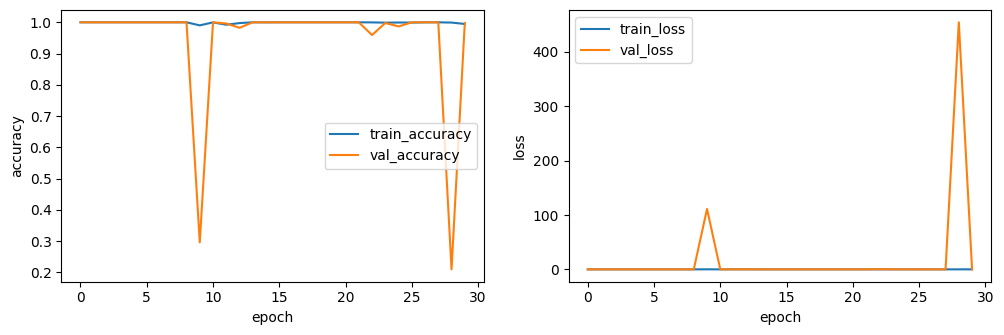

In [30]:
import matplotlib.pyplot as plt

def plot_results(model):
    # Set the figure size for better readability
    plt.figure(figsize=(12, 12))

    # First subplot: Plot accuracy over epochs (training vs validation)
    plt.subplot(3, 2, 1)  # Position in the grid (3x2 grid, first position)
    plt.plot(history.history['accuracy'], label='train_accuracy')  # Plot training accuracy
    plt.plot(history.history['val_accuracy'], label='val_accuracy')  # Plot validation accuracy
    plt.xlabel('epoch')  # Label the x-axis
    plt.ylabel('accuracy')  # Label the y-axis
    plt.legend()  # Show the legend

    # Second subplot: Plot loss over epochs (training vs validation)
    plt.subplot(3, 2, 2)  # Position in the grid (3x2 grid, second position)
    plt.plot(history.history['loss'], label='train_loss')  # Plot training loss
    plt.plot(history.history['val_loss'], label='val_loss')  # Plot validation loss
    plt.xlabel('epoch')  # Label the x-axis
    plt.ylabel('loss')  # Label the y-axis
    plt.legend()  # Show the legend

    # Display the plots
    plt.show()

# Call the function to plot the results
plot_results(model)

#Saving the Model

In [31]:
# Save the trained model to a file in Keras' `.keras` format
model.save('asl_model_V2.keras')

In [ ]:
np.save('x_train_V2.npy', x_train_denormalized)  # Saves the denormalized training images
np.save('y_train_V2.npy', y_train)  # Saves the corresponding labels for the training data
np.save('x_test_V2.npy', x_test_denormalized)  # Saves the denormalized test images
np.save('y_test_V2.npy', y_test)  # Saves the corresponding labels for the test data

In [ ]:
# Save the trained model to a file in Keras' `.keras` format
model.save('asl_model_V2.keras')  # Save the entire model (architecture + weights)

# Save the training and test data (both images and labels) to a compressed .npz file
np.savez('dataset_V2.npz',            # Save all data into one .npz (zip format) file
         x_train=x_train_denormalized,  # Denormalized training images
         y_train=y_train,              # Training labels
         x_test=x_test_denormalized,   # Denormalized test images
         y_test=y_test)                # Test labels

# Print confirmation message
print("Model and data successfully saved!")  # Prints: "Model and data saved successfully!"

Modello e dati salvati con successo!


# Load the Model

In [ ]:
from tensorflow.keras.models import load_model

# Load the previously saved Keras model from the .keras file
model = load_model('asl_model_V2.keras')  # Load the model from the specified file path

In [ ]:
import numpy as np

# Load the previously saved training and test data from .npy files
x_test = np.load('x_test_V2.npy')  # Load the test images
y_test = np.load('y_test_V2.npy')  # Load the test labels
x_train = np.load('x_train_V2.npy')  # Load the training images
y_train = np.load('y_train_V2.npy')  # Load the training labels

# Print the shape (dimensions) of each dataset
print(f"x_test shape: {x_test.shape}")  # Output the shape of test images
print(f"y_test shape: {y_test.shape}")  # Output the shape of test labels
print(f"x_train shape: {x_train.shape}")  # Output the shape of training images
print(f"y_train shape: {y_train.shape}")  # Output the shape of training labels

x_test shape: (1010, 32, 32, 3)
y_test shape: (1010, 5)
x_train shape: (9083, 32, 32, 3)
y_train shape: (9083, 5)


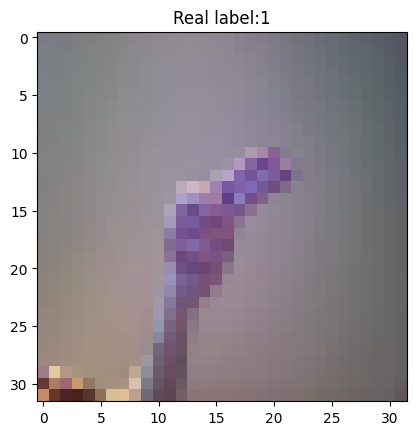

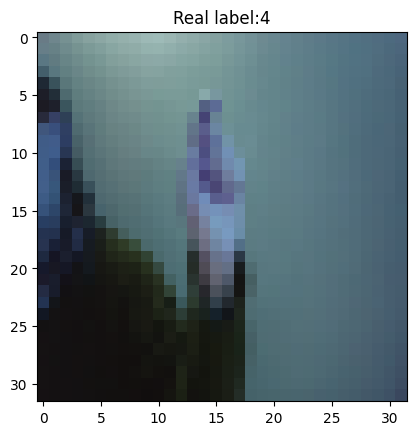

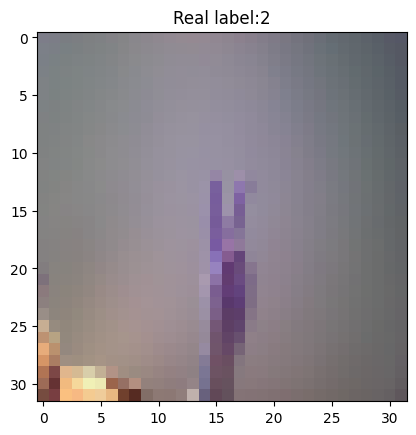

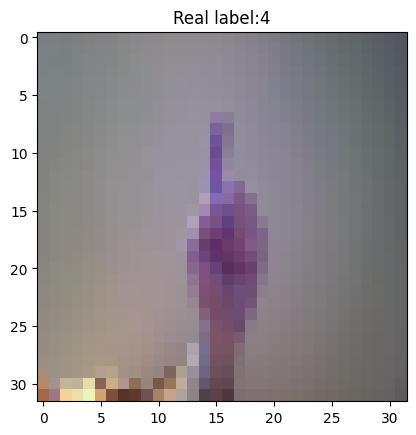

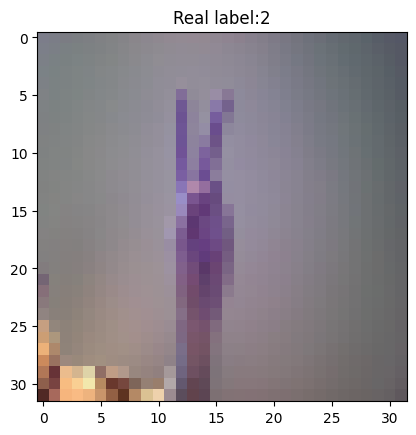

In [ ]:
import matplotlib.pyplot as plt

# Load the previously saved training and test data
x_train = np.load('x_train_V2.npy')  # Load the training images (denormalized)
y_train = np.load('y_train_V2.npy')  # Load the training labels
x_test = np.load('x_test_V2.npy')  # Load the test images (denormalized)
y_test = np.load('y_test_V2.npy')  # Load the test labels

# Denormalization: Scale the pixel values to [0, 1] by dividing by 255
x_train_pict = x_train / 255.0
x_test_pict = x_test / 255.0

# Visualization: Display the first 5 images from the training set
for i in range(5):
    plt.imshow(x_train_pict[i], cmap='gray')  # Display image, use 'gray' for grayscale images
    plt.title(f'Real label:{np.argmax(y_train[i])}')  # Show the true label (index of the max class)
    plt.show()

# Predictions

In [ ]:
# Load the dataset containing all images as a NumPy array
all_images = np.load('all_images_matrices.npy')

# Verify and normalize the images if necessary
if all_images.max() > 1.0:  # Check if the image pixel values are in the range [0, 255]
    all_images = all_images.astype('float32') / 255.0  # Normalize pixel values to [0, 1]

# Print the shape of the loaded images and their pixel value range
print(f"Shape of the loaded images: {all_images.shape}")  # Shape of the images array
print(f"Pixel range: Min {all_images.min()}, Max {all_images.max()}")  # Min and Max pixel values

Shape delle immagini caricate: (5, 32, 32, 3)
Range dei pixel: Min 0.05098039284348488, Max 0.95686274766922


In [ ]:
# Extract the 5th image from the dataset (index 4)
single_image = all_images[4].reshape(1, 32, 32, 3)  # Reshaping it to match the input shape for the model

# Predict the class for this single image using the trained model
prediction = model.predict(single_image)

# Print the predicted class and its probability
print(f"Predicted class: {np.argmax(prediction)}")  # The predicted class (index of the highest probability)
print(f"Probability: {np.max(prediction)}")  # The probability (confidence) of the predicted class

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
Classe prevista: 0
Probabilità: 0.7478427290916443


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


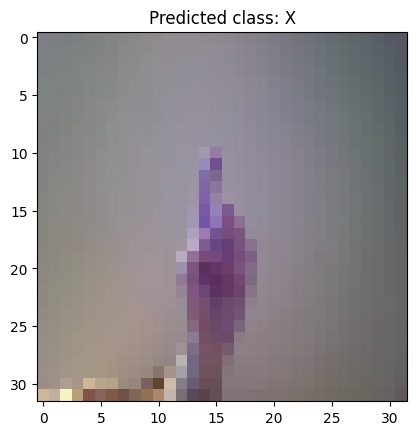

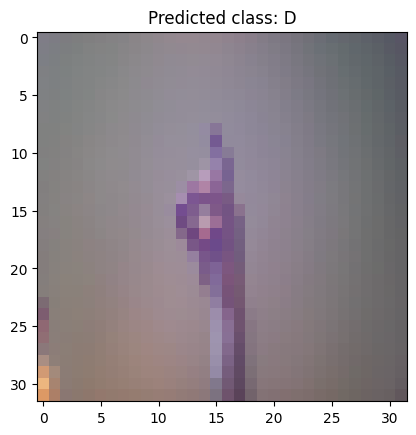

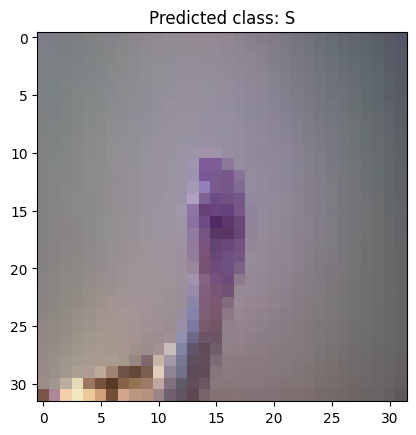

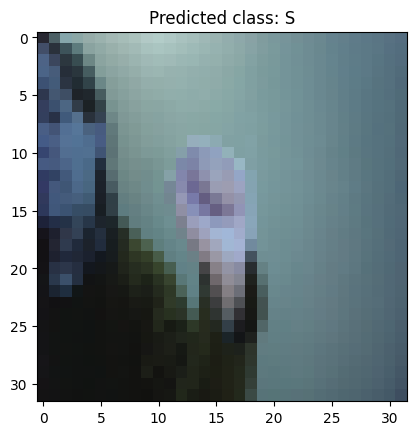

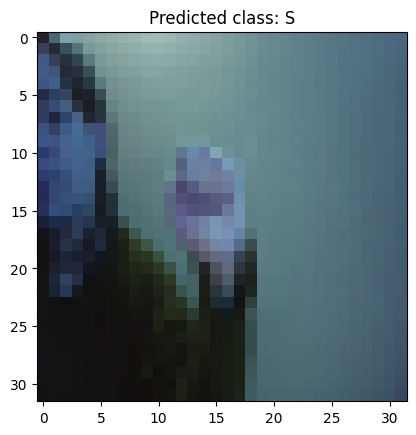

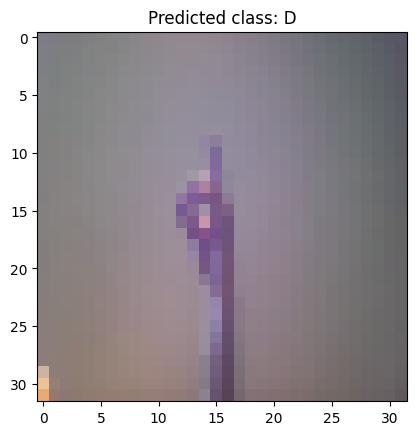

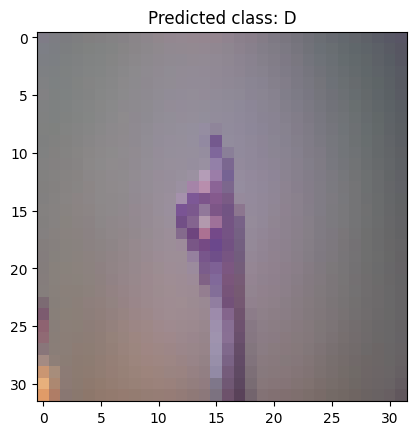

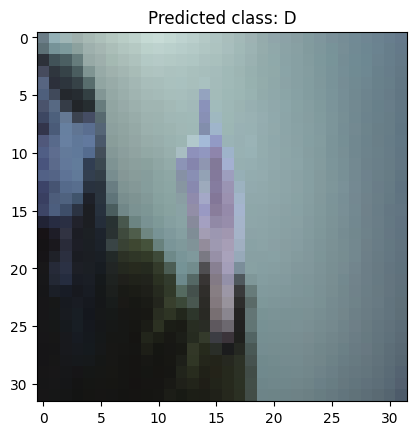

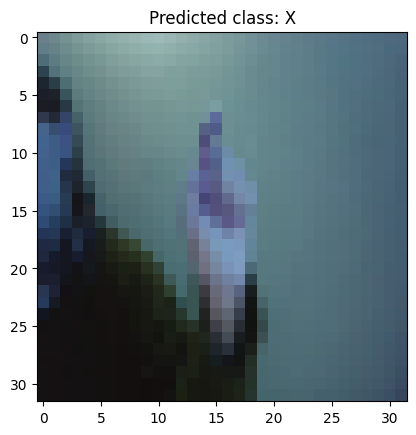

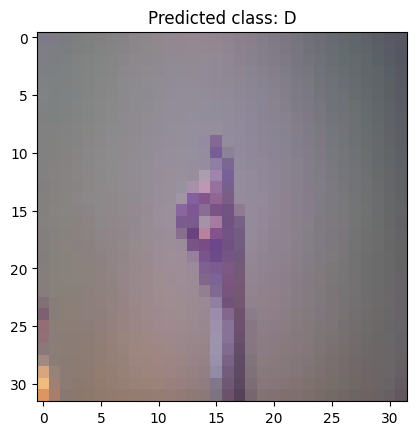

In [ ]:
# List of possible classes (labels)
classes = ['D', 'H', 'K', 'S', 'X']

# Get predictions for all test images using the trained model
predictions = model.predict(x_test)  # Get prediction probabilities for all test images

# Loop through the first 10 images
for i in range(10):
    # Get the predicted class index for the i-th image (the class with the highest probability)
    predicted_class_index = np.argmax(predictions[i])  # Returns index of highest probability

    # Get the corresponding class name
    predicted_class = classes[predicted_class_index]  # Map the index to the class label

    # Display the image
    plt.imshow(x_test_pict[i], cmap='gray')  # Show the i-th image (ensure it's in the correct format)
    plt.title(f'Predicted class: {predicted_class}')  # Display the predicted class
    plt.show()  # Show the image and title

# Create a dictionary to match positional indices to letters

In [ ]:
# Mapping of numeric labels to corresponding class names
labels = {
    0: 'D',  # Class 0 corresponds to the letter 'D'
    1: 'H',  # Class 1 corresponds to the letter 'H'
    2: 'K',  # Class 2 corresponds to the letter 'K'
    3: 'S',  # Class 3 corresponds to the letter 'S'
    4: 'X'   # Class 4 corresponds to the letter 'X'
}

# Incorrect predictions classified

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Index: 53, Predict: D, Expected: X


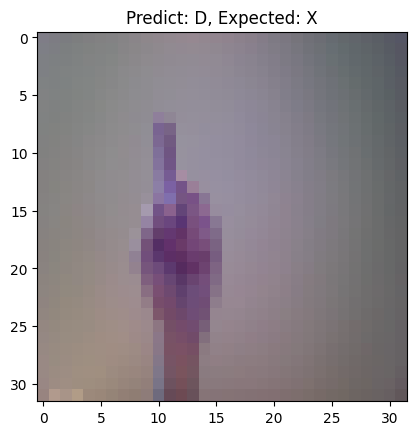

Index: 55, Predict: D, Expected: K


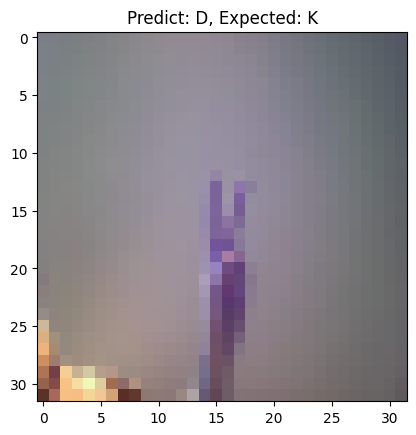

Index: 73, Predict: D, Expected: K


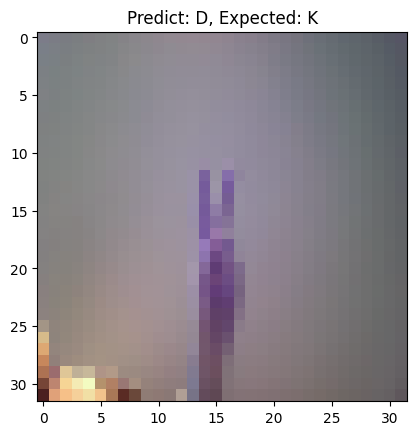

Index: 115, Predict: D, Expected: K


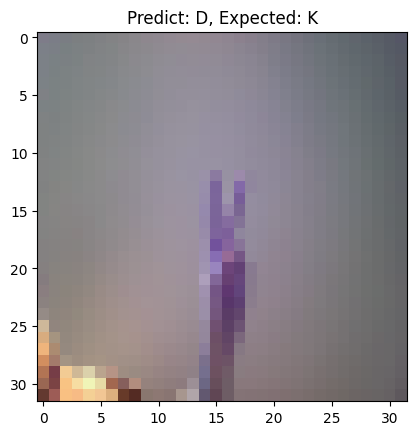

Index: 216, Predict: D, Expected: K


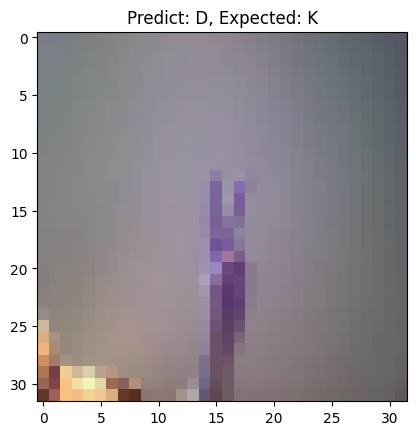

In [ ]:
# Initialize an empty list to store incorrect predictions
incorrect_predictions = []

# Get predictions for all test images
predictions = model.predict(x_test)

# Iterate through the predictions and the actual labels (y_test)
for i, (p, e) in enumerate(zip(predictions, y_test)):
    # Get the predicted class and the expected class (actual label)
    predicted, expected = np.argmax(p), np.argmax(e)

    # If the predicted class is not equal to the expected class, store the incorrect prediction
    if predicted != expected:
        incorrect_predictions.append((i, x_test_pict[i], labels[predicted], labels[expected]))

# Display the first 5 incorrect predictions
for idx, img, pred, exp in incorrect_predictions[:5]:
    # Print the index, predicted class, and expected class
    print(f"Index: {idx}, Predict: {pred}, Expected: {exp}")

    # Display the image for the incorrect prediction
    plt.imshow(img)
    plt.title(f"Predict: {pred}, Expected: {exp}")
    plt.show()

In [ ]:
# Get the number of incorrect predictions
num_incorrect_predictions = len(incorrect_predictions)

# Print the number of incorrect predictions with a descriptive message
print(f"Mistaken Predictions: {num_incorrect_predictions}")

Mistaken Predictions: 22


#Correct Predictions Classified

In [ ]:
# Initialize an empty list to store correct predictions
correct_predictions = []

# Get predictions for all test images
predictions = model.predict(x_test)

# Iterate through the predictions and actual labels (y_test)
for i, (p, e) in enumerate(zip(predictions, y_test)):
    # Get the predicted class and the expected class (actual label)
    predicted, expected = np.argmax(p), np.argmax(e)

    # For the first 10 images, print the predicted and expected classes
    if i < 10:
        print(f"Image {i}: Predict {labels[predicted]} | Expected {labels[expected]}")

    # If the predicted class is correct, store the correct prediction
    if predicted == expected:
        correct_predictions.append((i, x_test[i], labels[predicted], labels[expected]))

# Get the total number of correct predictions
num_correct_predictions = len(correct_predictions)

# Print the number of correct predictions out of the total number of test images
print(f"Correct predictions: {num_correct_predictions} out of {len(x_test)}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Image 0: Proedict X | Expected X
Image 1: Proedict D | Expected D
Image 2: Proedict S | Expected S
Image 3: Proedict S | Expected S
Image 4: Proedict S | Expected S
Image 5: Proedict D | Expected D
Image 6: Proedict D | Expected D
Image 7: Proedict D | Expected D
Image 8: Proedict X | Expected X
Image 9: Proedict D | Expected D
Correct predictions: 988 su 1010


#Confusion Matrix

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Shape of y_test: (1010, 5)
Shape of y_pred: (1010, 5)
Confusion Matrix (DataFrame):
     D    H    K    S    X
D  211    0    0    0    0
H    1  214    0    0    0
K   19    0  162    0    0
S    1    0    0  223    0
X    1    0    0    0  178


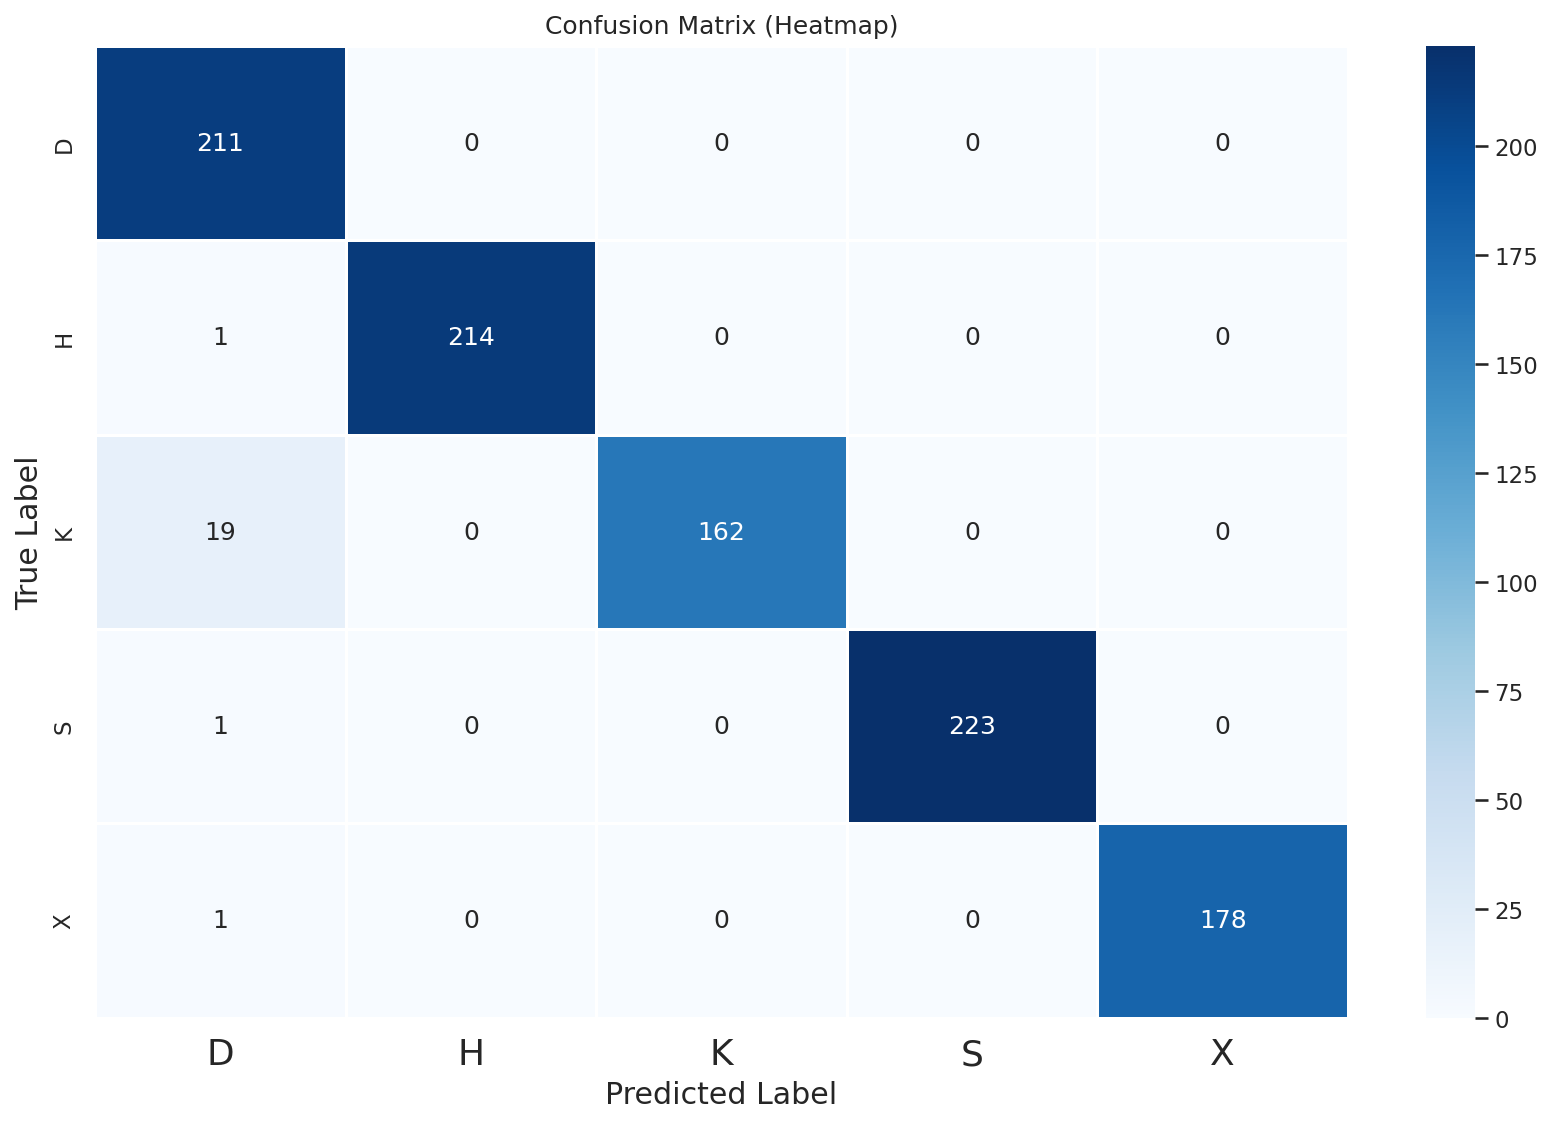

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import itertools

# Set style for the plots
plt.style.use('fivethirtyeight')  # Use a specific plot style
sns.set(context="notebook", palette="dark", style='whitegrid', color_codes=True)  # Seaborn plot configuration

# Global plot configuration parameters
params = {
    'axes.labelsize': "large",        # Set label size for axes
    'xtick.labelsize': 'x-large',     # Set size for x-axis ticks
    'legend.fontsize': 20,            # Set font size for the legend
    'figure.dpi': 150,                # Set figure resolution
    'figure.figsize': [25, 7]         # Set figure size
}

# Update Matplotlib's default settings with the defined parameters
plt.rcParams.update(params)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function plots the confusion matrix.
    """
    # Normalize the confusion matrix if specified
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Plot the confusion matrix as an image
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()  # Add color bar
    tick_marks = np.arange(len(classes))  # Position for the class labels
    plt.xticks(tick_marks, classes, rotation=45)  # Set x-axis ticks with class labels
    plt.yticks(tick_marks, classes)  # Set y-axis ticks with class labels

    # Add text annotations inside the confusion matrix
    thresh = cm.max() / 2.  # Calculate threshold for text color
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f'{cm[i, j]:.2f}' if normalize else f'{cm[i, j]}',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    # Adjust layout
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Make predictions using the trained model
y_pred = model.predict(x_test)  # Predictions on the test data

# Define the class labels
labels_cm = ("D","H","K", "S","X")  # Class labels

# Check the shape of y_test to understand if it's one-hot encoded or already a label array
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of y_pred: {y_pred.shape}")

# If y_test is one-hot encoded, convert it to class labels using argmax
if y_test.ndim > 1:  # If it's a 2D array (one-hot encoded)
    y_test = np.argmax(y_test, axis=1)

# Calculate the confusion matrix by comparing true labels with predicted ones
confusion_mtx = confusion_matrix(y_test, np.argmax(y_pred, axis=1))

# Create a DataFrame for better visualization of the confusion matrix
df_cm = pd.DataFrame(confusion_mtx, index=labels_cm, columns=labels_cm)
print("Confusion Matrix (DataFrame):")
print(df_cm)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues", linewidths=.5)  # Create a heatmap with annotations
plt.title("Confusion Matrix (Heatmap)")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()  # Display the plot

#SHAP
#### Representation to show points that have positive (red) or negative (blue) impact on correct predictions

Displaying the image from x_test_pict at index 11 because the data augmentation made it impossible to display it like normal next to the Shap Analysis


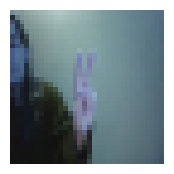

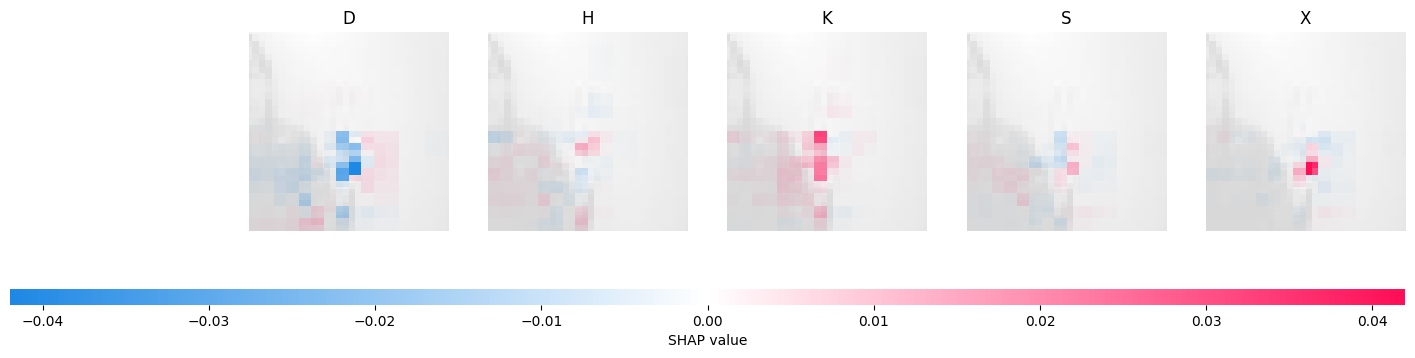

In [ ]:
import shap
labels_cm = ("D","H","K", "S","X")
# Assuming you have a pre-trained model called `model`
def f(x):
    # The model function that simply takes in data and returns model predictions
    tmp = x.copy()  # Creating a copy of input to avoid changing the original data
    return model(tmp)  # Return model predictions

# Step 1: Define masker for image data (with a blur operation)
masker_blur = shap.maskers.Image("blur(32,32)", x_test[11].shape)  # Adjust the blur size if needed for your data

# Step 2: Select the first image from x_test for evaluation
ind = [11]  # Use the first image (index 0) from x_test for SHAP computation

# Step 3: Check if the image is in the correct range
x_test_processed = x_test[ind]  # Select the specific image for SHAP analysis

# Print the image at the same index from `x_test_pict` (assuming it is the original image)
print("Displaying the image from x_test_pict at index", ind[0], "because the data augmentation made it impossible to display it like normal next to the Shap Analysis")

# Create a smaller figure size for displaying the image
plt.figure(figsize=(2, 2))  # Adjust the size to be smaller for better visualization
plt.imshow(x_test_pict[ind[0]])  # Display the original image from x_test_pict
plt.axis('off')  # Turn off axis labels to focus on the image
plt.show()  # Show the image plot

# Step 4: Ensure x_test_processed is in the correct range for SHAP analysis
if x_test_processed.max() <= 255:
    # If it's integer (0-255), clip the values to that range
    x_test_processed = np.clip(x_test_processed, 0, 255)
elif x_test_processed.max() <= 1.0:
    # If it's float (0.0-1.0), clip to that range
    x_test_processed = np.clip(x_test_processed, 0, 1)

# Step 5: Create the SHAP explainer
explainer = shap.Explainer(f, masker_blur, output_names=labels_cm)  # Assuming 5 output classes

# Step 6: Calculate SHAP values using the original x_test data
shap_values_ = explainer(x_test_processed, max_evals=5000, batch_size=50)

# Step 7: Visualize the SHAP values for the selected image
shap.image_plot(shap_values_[0], show=True)  # Display the image and SHAP values on it

# Testing against the original dataset

In [ ]:
# Load the test images and labels from the saved files
x_test = np.load('olddata.npy')  # Load test images from 'olddata.npy'
y_test = np.load('labels.npy')   # Load test labels from 'labels.npy'

# Store the images for display purposes (unchanged)
x_test_pict = x_test  # Store the images in their original form

# Denormalize the images by multiplying by 255 (assuming pixel values were between 0 and 1)
x_test = x_test_pict * 255  # Scale pixel values back to the range of 0-255

# Print the shape and pixel range of the loaded images
print(f"Shape of loaded images: {x_test.shape}")  # Print the shape of x_test
print(f"Pixel range: Min {x_test.min()}, Max {x_test.max()}")  # Print the min and max pixel values

# Display the original images (before denormalization)
print(x_test_pict)  # Print the original images for reference

Shape delle immagini caricate: (15000, 32, 32, 3)
Range dei pixel: Min 0.0, Max 255.0
[[[[0.16078432 0.12941177 0.5647059 ]
   [0.22745098 0.1764706  0.38431373]
   [0.22745098 0.18431373 0.40392157]
   ...
   [0.61960787 0.56078434 0.77254903]
   [0.6156863  0.56078434 0.77254903]
   [0.54901963 0.49411765 0.79607844]]

  [[0.27450982 0.22745098 0.42745098]
   [0.37254903 0.30588236 0.1882353 ]
   [0.36078432 0.28627452 0.19215687]
   ...
   [0.78039217 0.6862745  0.57254905]
   [0.81960785 0.7372549  0.6117647 ]
   [0.7294118  0.65882355 0.6666667 ]]

  [[0.3529412  0.32156864 0.5411765 ]
   [0.49411765 0.43529412 0.3372549 ]
   [0.4745098  0.40784314 0.3254902 ]
   ...
   [0.67058825 0.5372549  0.4       ]
   [0.6901961  0.56078434 0.40392157]
   [0.60784316 0.49803922 0.48235294]]

  ...

  [[0.43529412 0.4392157  0.69803923]
   [0.6117647  0.6156863  0.5764706 ]
   [0.6039216  0.6039216  0.5882353 ]
   ...
   [0.6627451  0.61960787 0.6       ]
   [0.65882355 0.61960787 0.5882353 ]

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


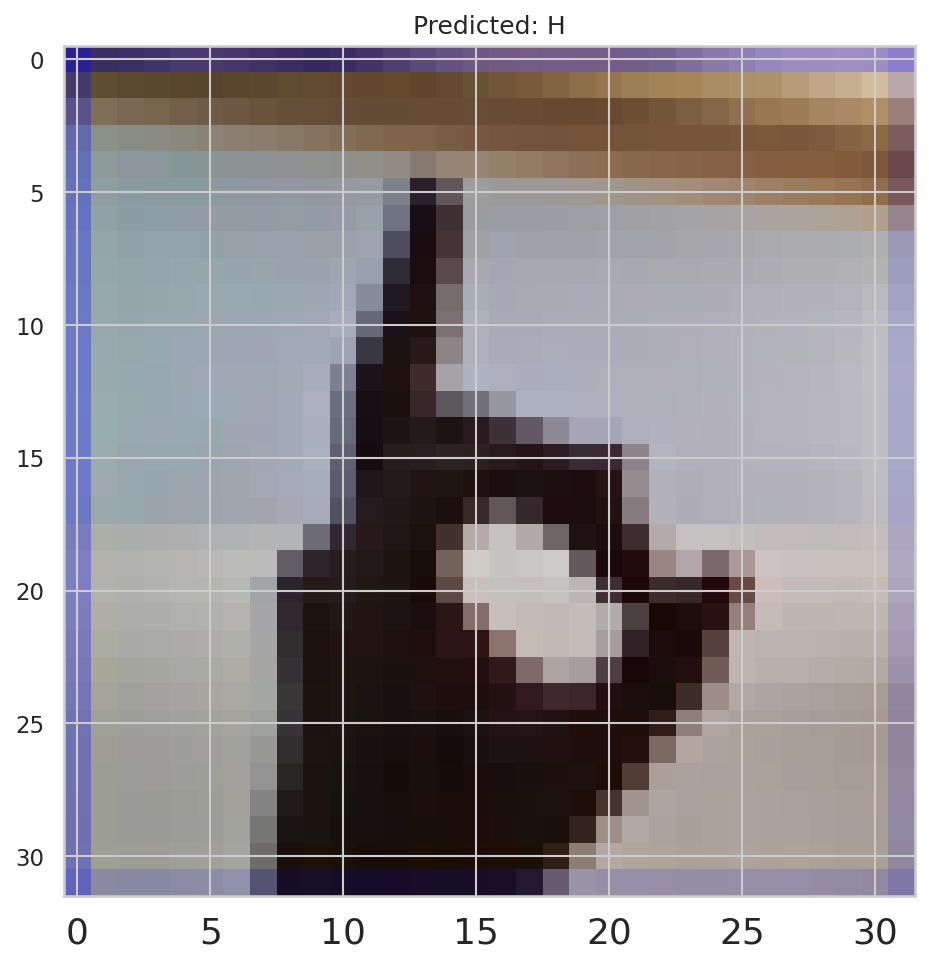

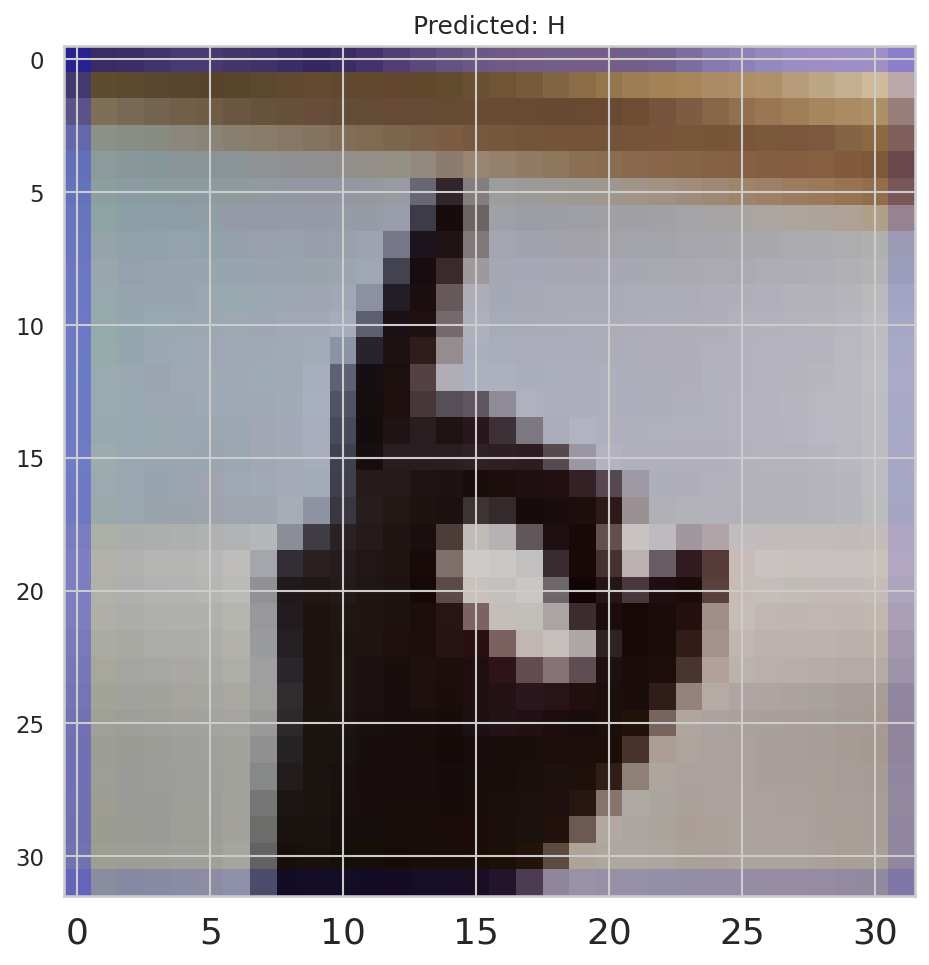

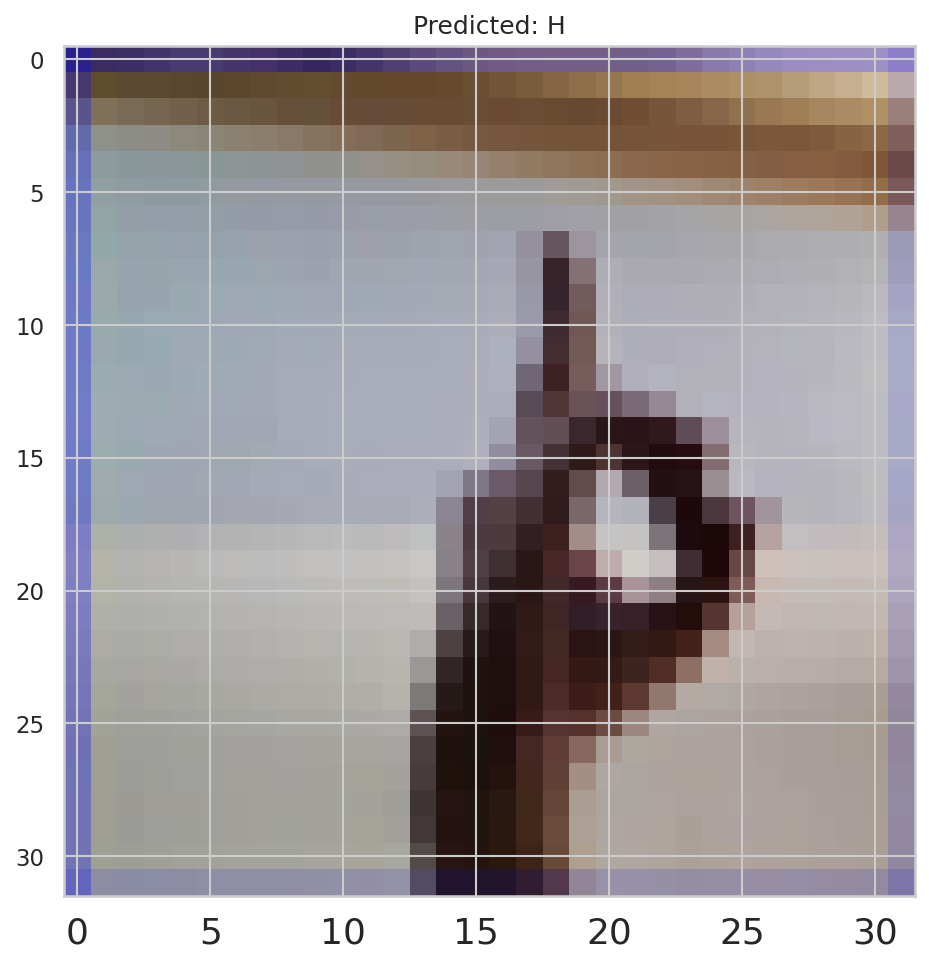

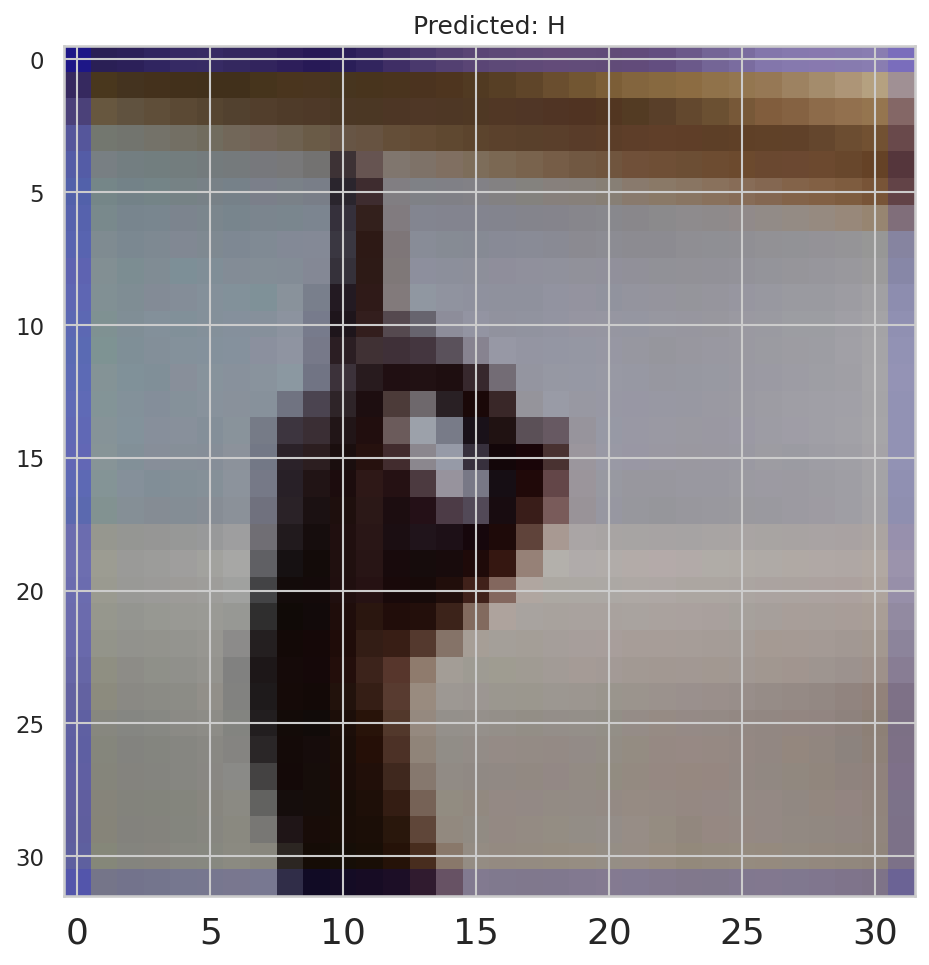

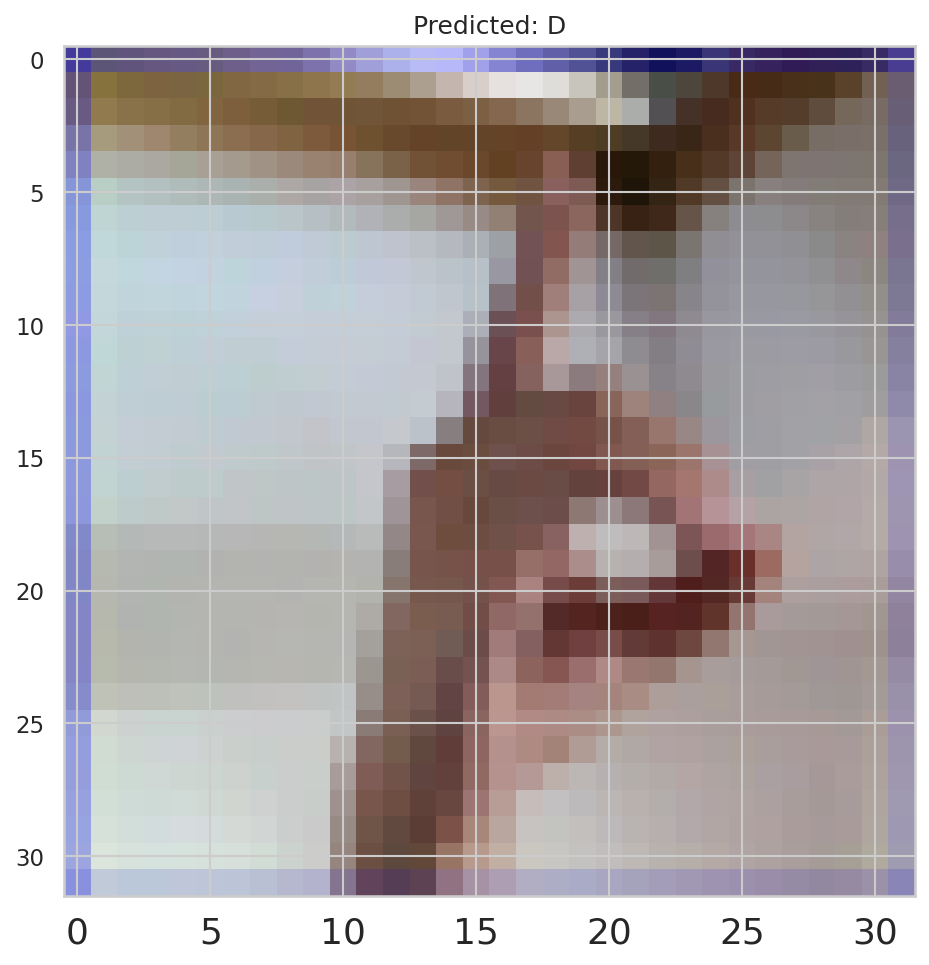

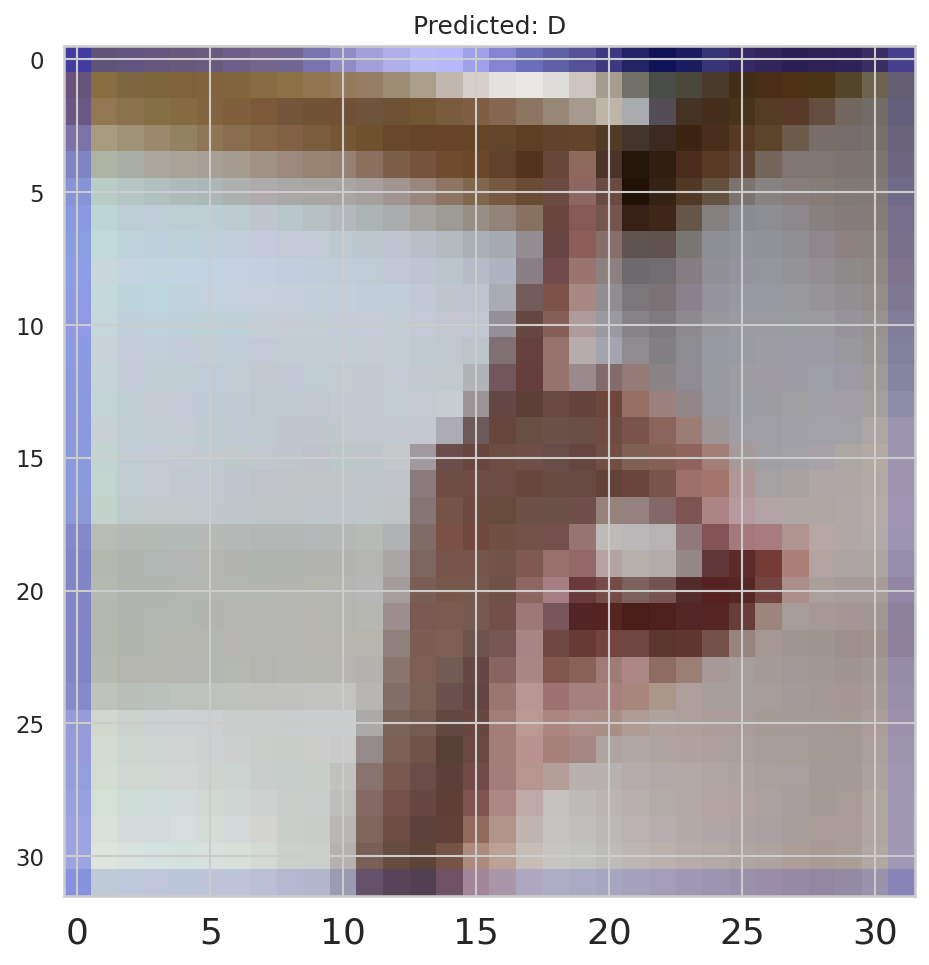

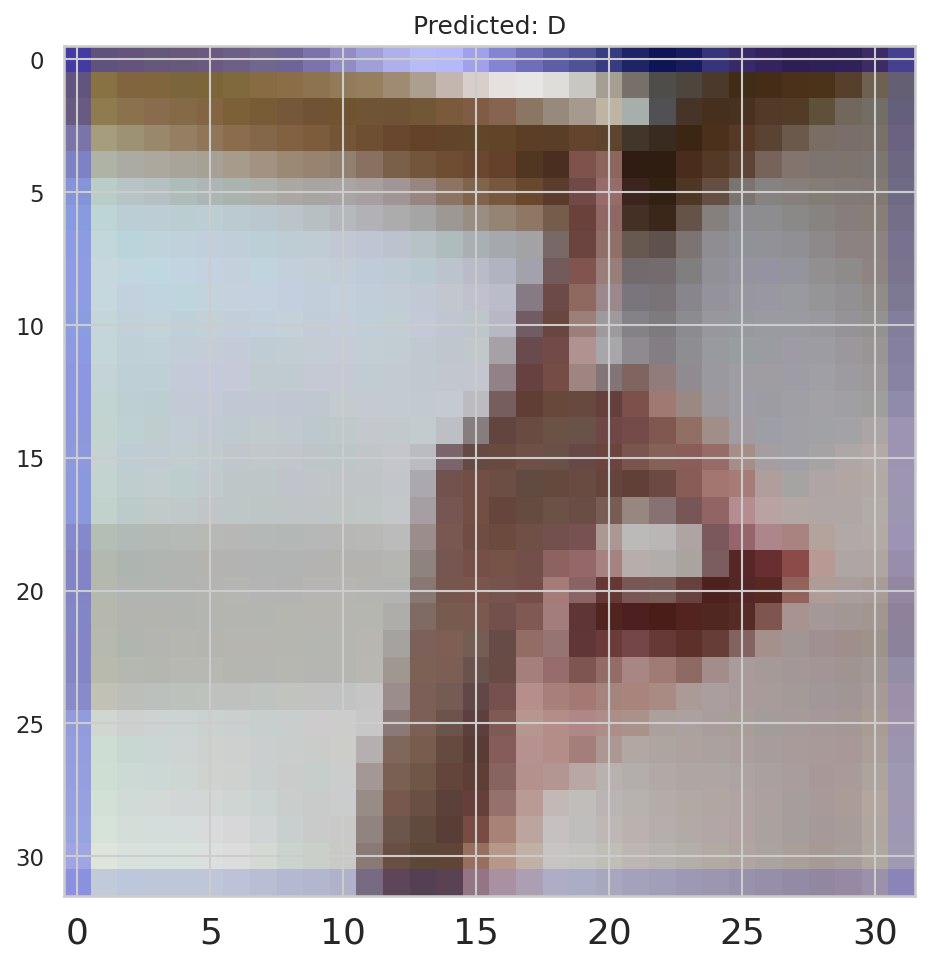

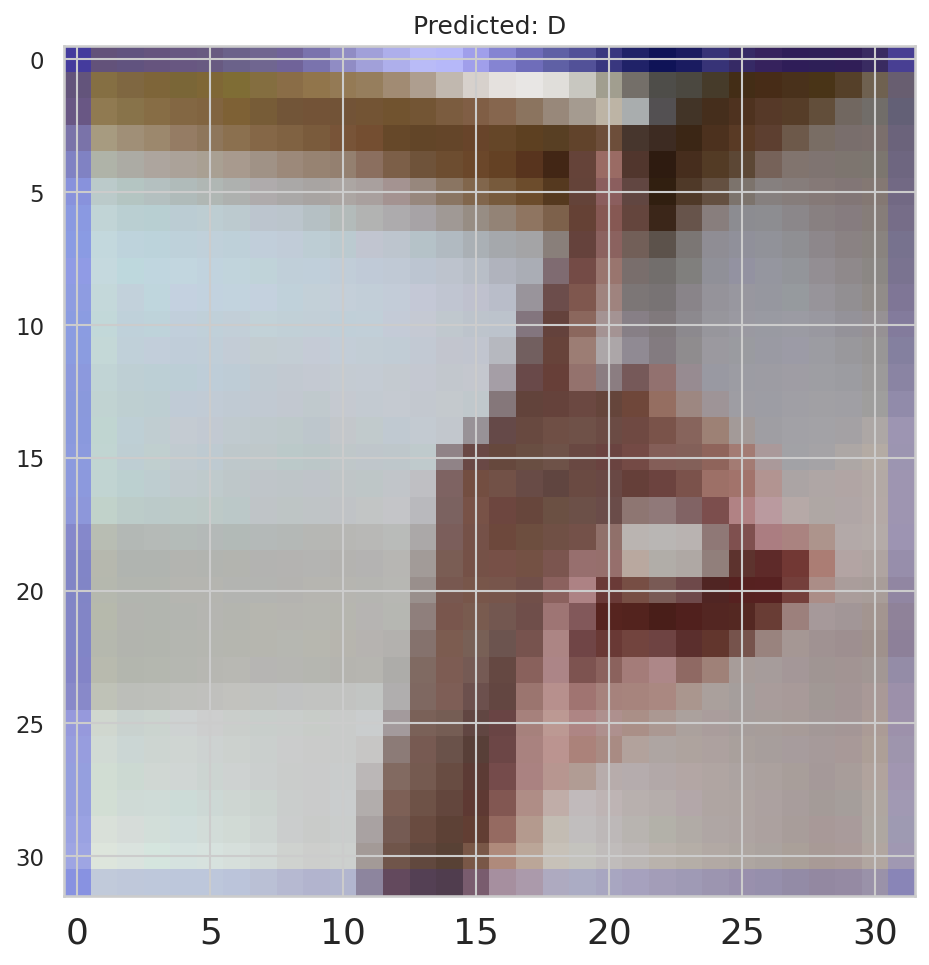

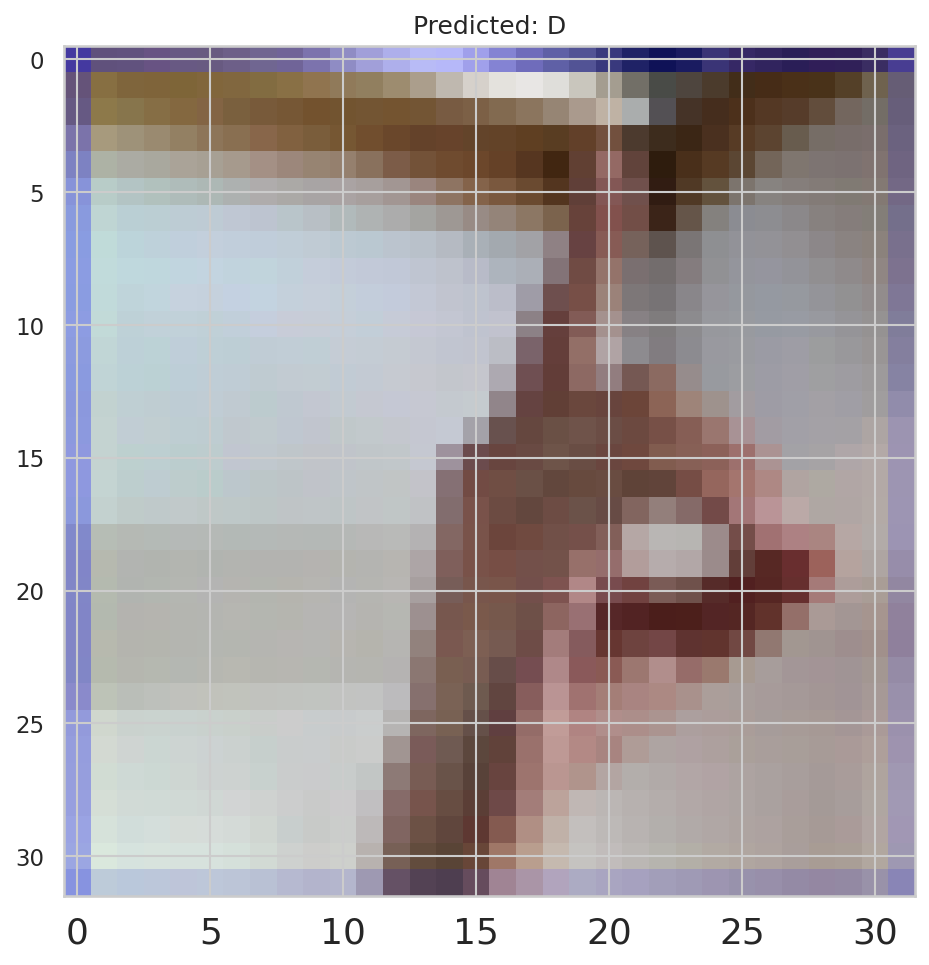

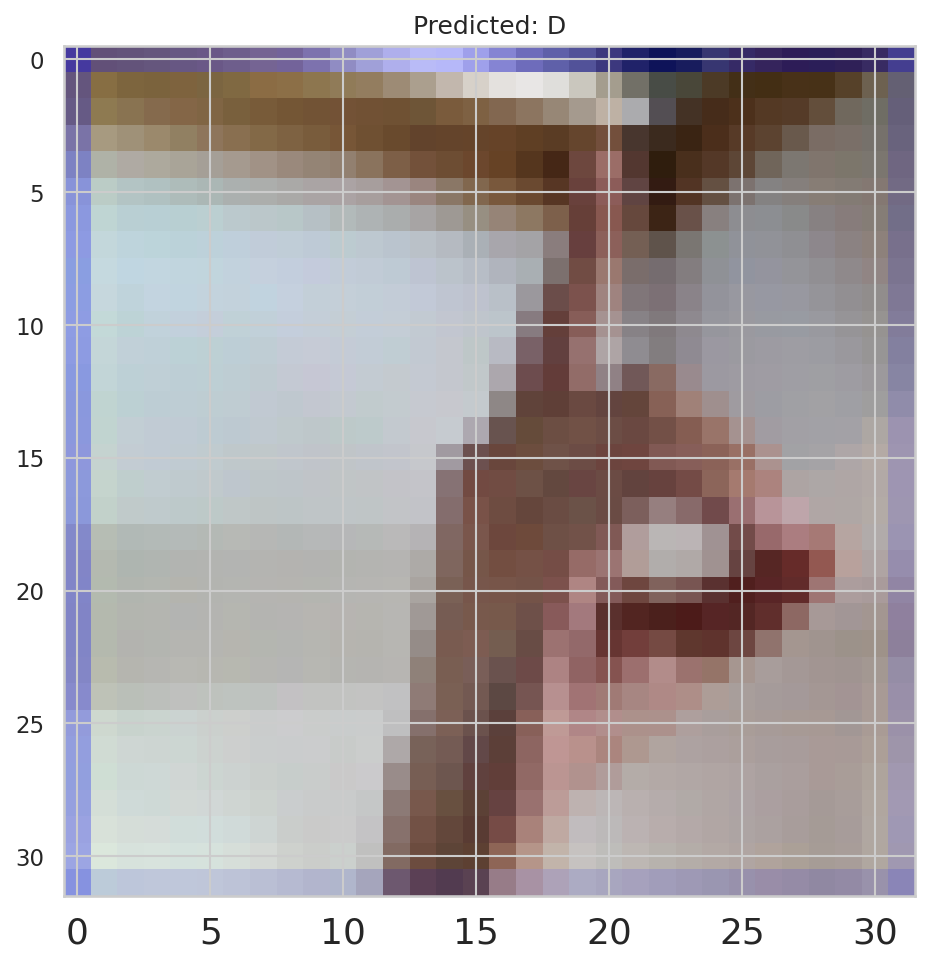

In [ ]:
# Define the class labels for the predictions
classes = ['D', 'H', 'K', 'S', 'X']

# Use the model to make predictions on the test set
predictions = model.predict(x_test)

# Loop through the first 10 test samples to visualize the predictions
for i in range(10):
    # Get the predicted class index by finding the maximum value in the prediction array
    predicted_class_index = np.argmax(predictions[i])

    # Map the predicted class index to the corresponding label
    predicted_class = classes[predicted_class_index]

    # Display the image from the test set
    plt.imshow(x_test_pict[i], cmap='gray')  # Show the image (in grayscale)

    # Set the title of the plot to show the predicted class label
    plt.title(f'Predicted: {predicted_class}')

    # Show the image with the prediction title
    plt.show()

#Incorrect Predictions

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Index: 0, Predicted: H, Expected: D


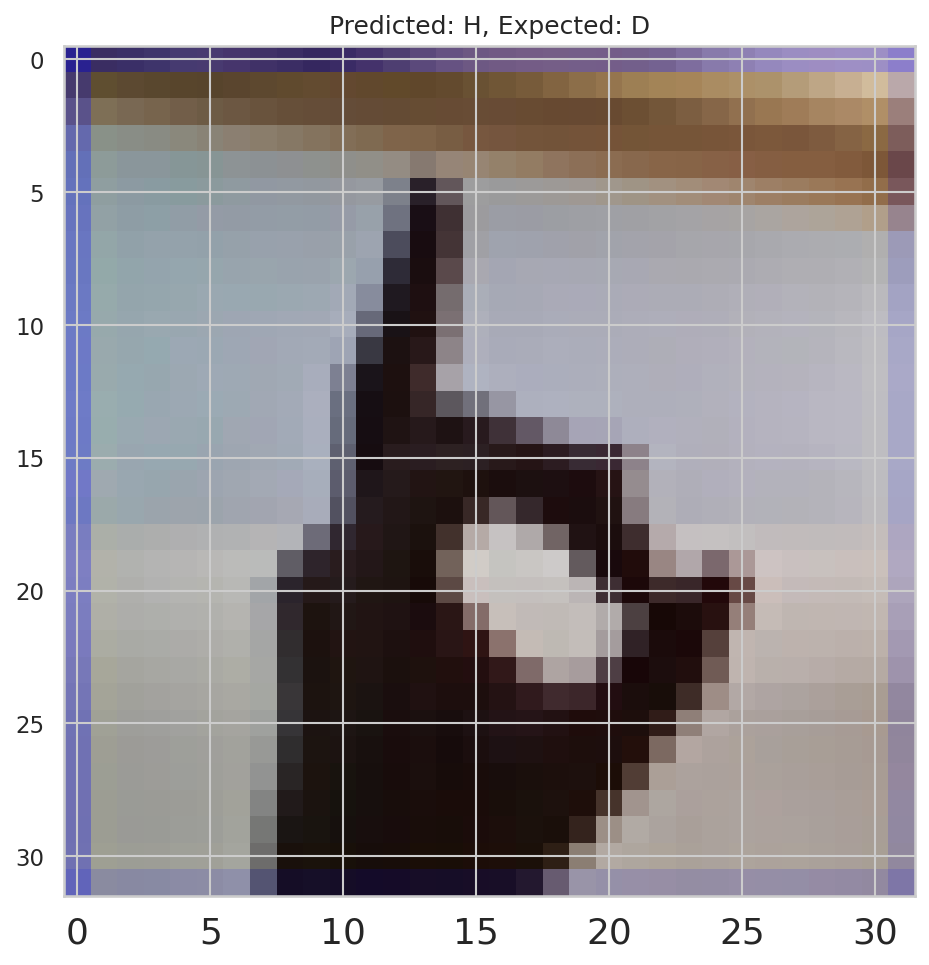

Index: 1, Predicted: H, Expected: D


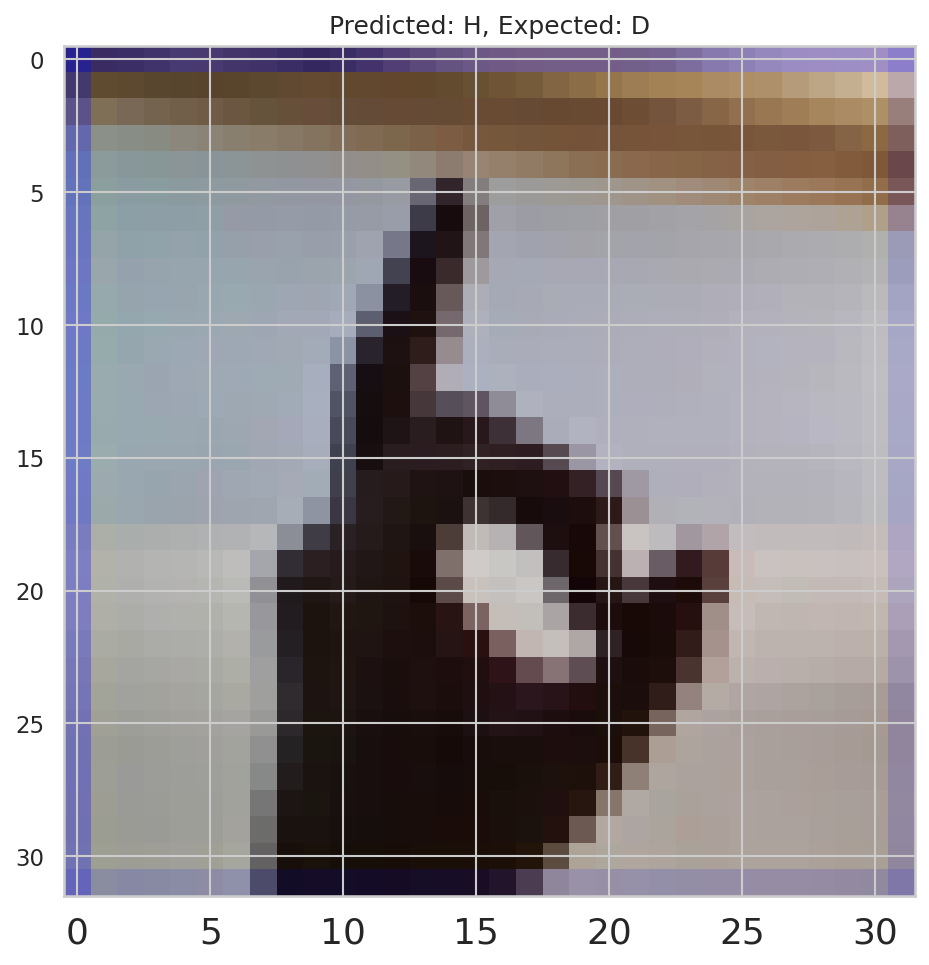

Index: 2, Predicted: H, Expected: D


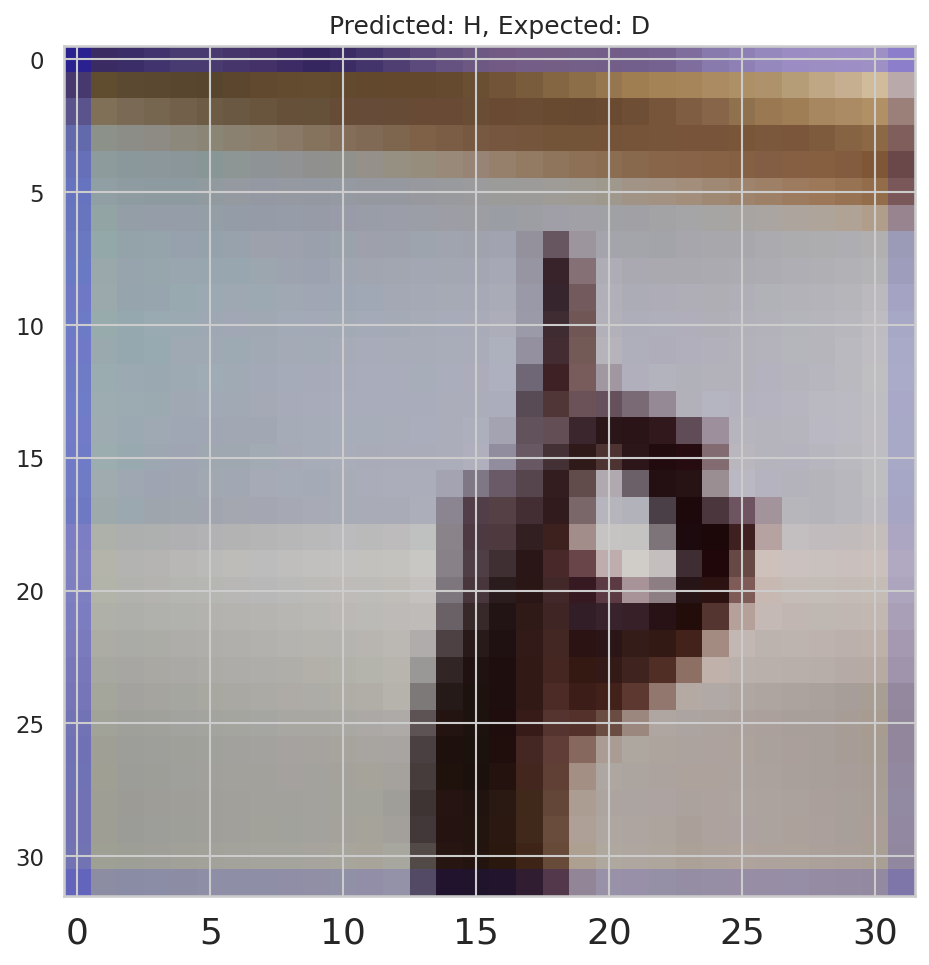

Index: 3, Predicted: H, Expected: D


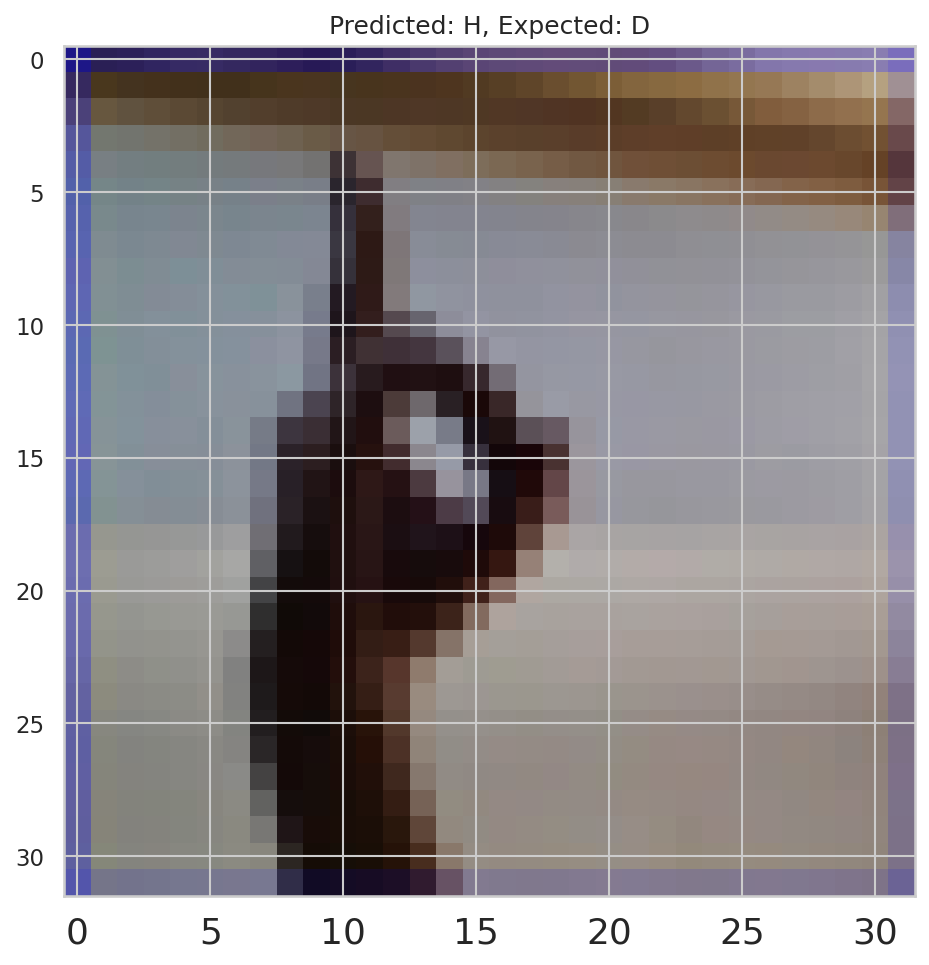

Index: 13, Predicted: H, Expected: D


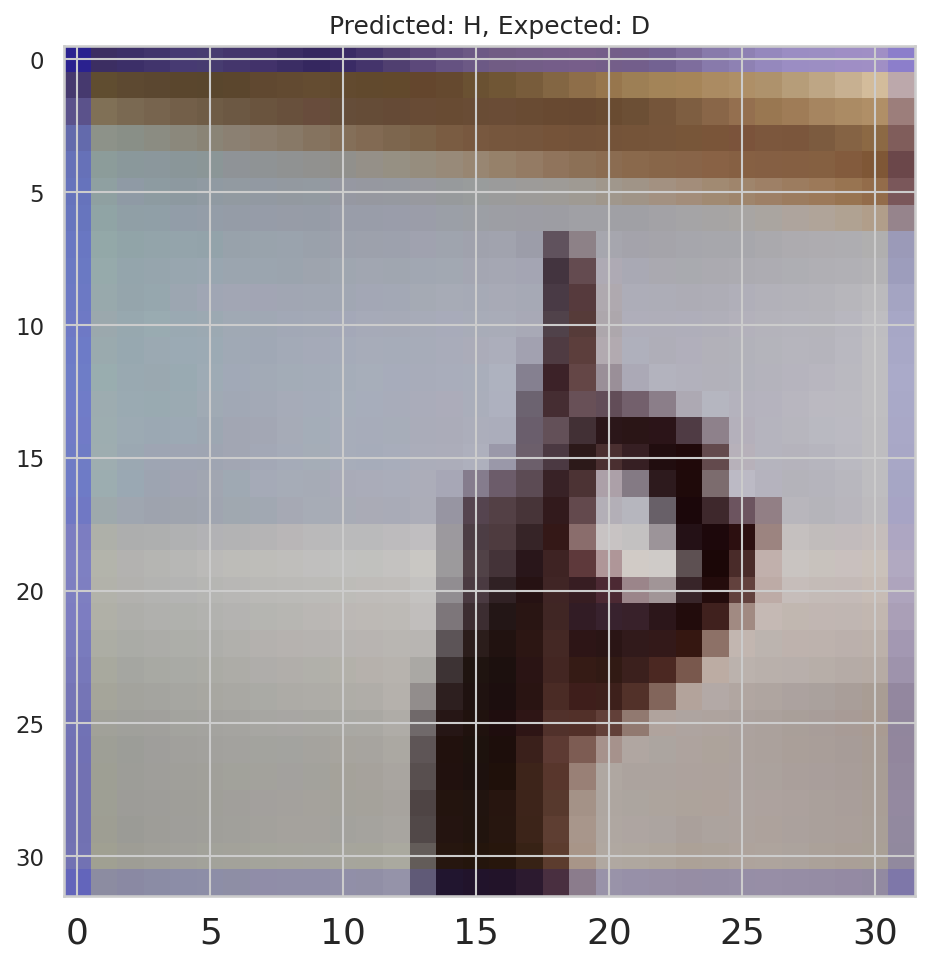

In [ ]:
# Initialize a list to store incorrect predictions
incorrect_predictions = []

# Use the model to predict the test set
predictions = model.predict(x_test)

# Loop through the predictions and compare with the actual labels
for i, (p, e) in enumerate(zip(predictions, y_test)):
    # Get the predicted class and the expected class (from the labels)
    predicted, expected = np.argmax(p), np.argmax(e)

    # If the prediction is incorrect, store the image, predicted and expected labels
    if predicted != expected:
        incorrect_predictions.append((i, x_test_pict[i], labels[predicted], labels[expected]))

# Display information for the first 5 incorrect predictions
for idx, img, pred, exp in incorrect_predictions[:5]:
    # Print the index, predicted class, and expected class
    print(f"Index: {idx}, Predicted: {pred}, Expected: {exp}")

    # Show the image of the incorrect prediction
    plt.imshow(img)  # Display the image
    plt.title(f"Predicted: {pred}, Expected: {exp}")  # Set title with predicted and expected labels
    plt.show()  # Display the image

In [ ]:
# Get the number of incorrect predictions
num_incorrect_predictions = len(incorrect_predictions)

# Print the total number of incorrect predictions with a descriptive message
print(f"Mistaken Predictions: {num_incorrect_predictions}")

Mistaken Predictions: 9903


#Correct Predictions

In [ ]:
# Initialize a list to store correct predictions
correct_predictions = []

# Use the model to predict the test set
predictions = model.predict(x_test)

# Loop through the predictions and compare with the actual labels
for i, (p, e) in enumerate(zip(predictions, y_test)):
    # Get the predicted class and the expected class (from the labels)
    predicted, expected = np.argmax(p), np.argmax(e)

    # Print the predicted and expected labels for the first 10 images
    if i < 10:
        print(f"Immagine {i}: Predetta {labels[predicted]} | Reale {labels[expected]}")

    # If the prediction is correct, store the image and predicted/expected labels
    if predicted == expected:
        correct_predictions.append((i, x_test[i], labels[predicted], labels[expected]))

# Get the total number of correct predictions
num_correct_predictions = len(correct_predictions)

# Print the number of correct predictions
print(f"Correct Predictions: {num_correct_predictions} su {len(x_test)}")

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Immagine 0: Predetta H | Reale D
Immagine 1: Predetta H | Reale D
Immagine 2: Predetta H | Reale D
Immagine 3: Predetta H | Reale D
Immagine 4: Predetta D | Reale D
Immagine 5: Predetta D | Reale D
Immagine 6: Predetta D | Reale D
Immagine 7: Predetta D | Reale D
Immagine 8: Predetta D | Reale D
Immagine 9: Predetta D | Reale D
Correct Predictions: 5097 su 15000


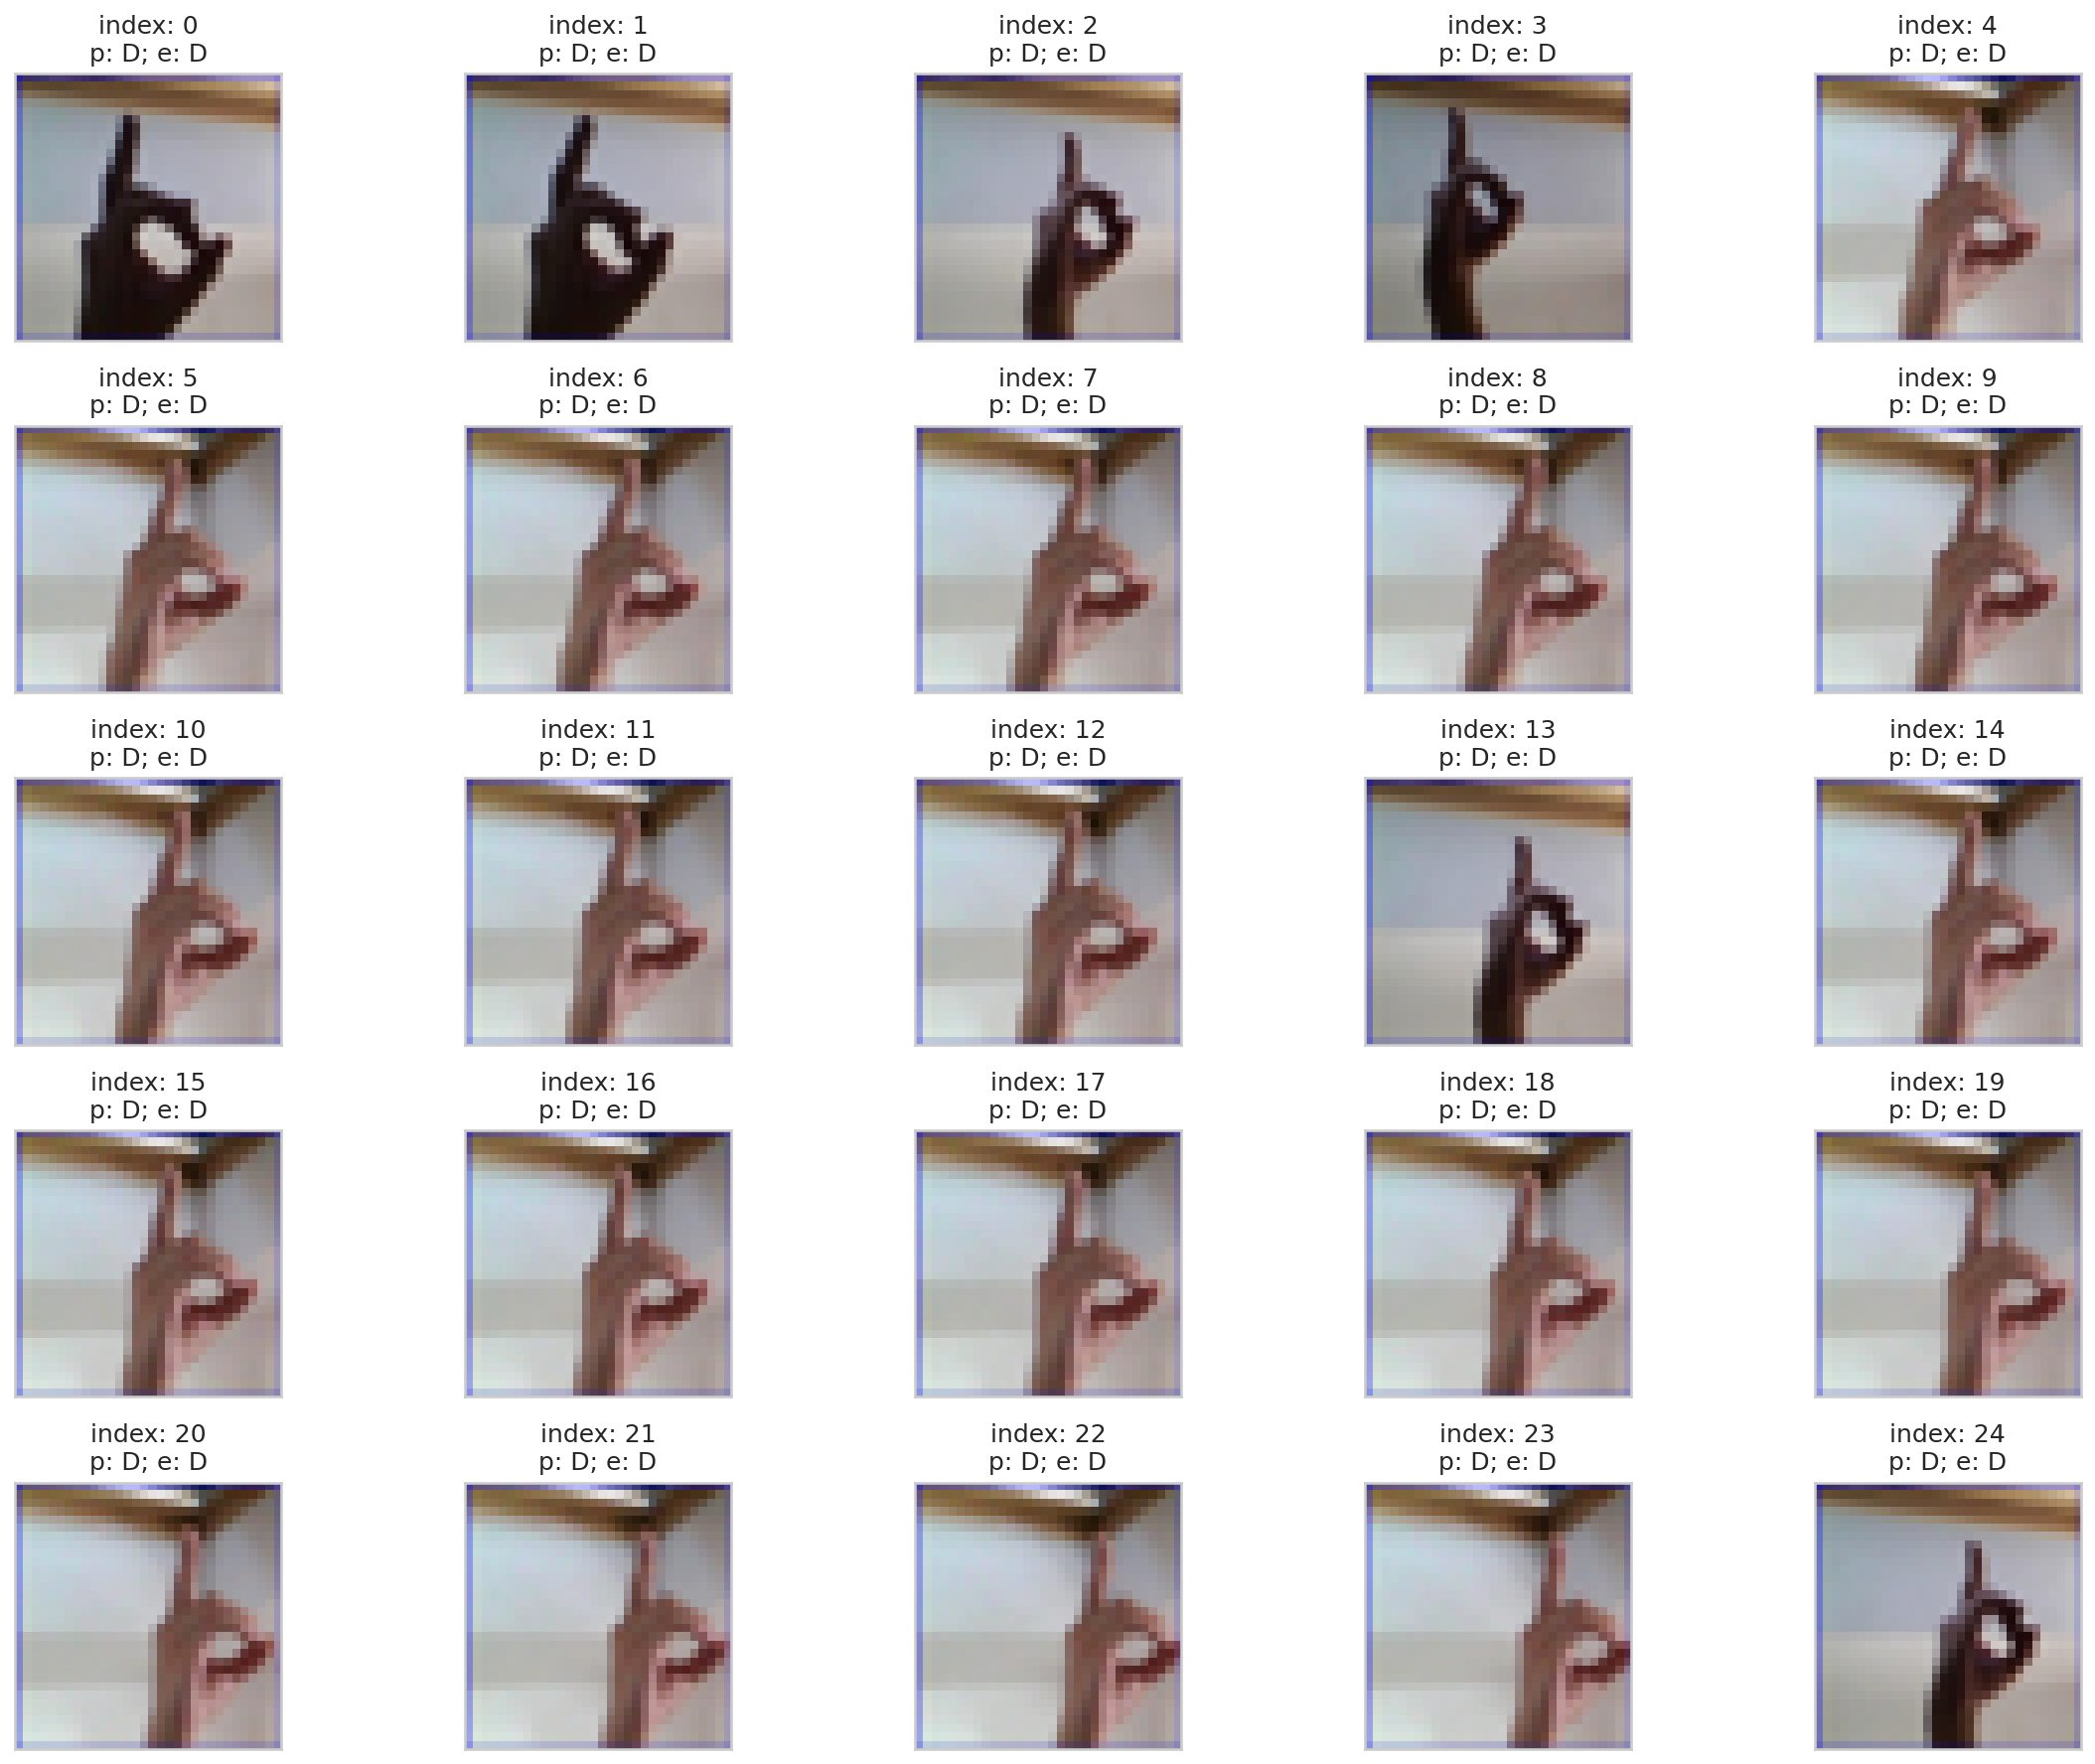

In [ ]:
# Create a grid of 5x5 subplots to display images
figure, axes = plt.subplots(nrows=5, ncols=5, figsize=(16, 12))

# Loop through the axes and the correct predictions
for ax, item in zip(axes.ravel(), correct_predictions):
    # Unpack the information for each correct prediction
    index, image, predicted, expected = item

    # Display the image on the respective axis with a gray colormap
    ax.imshow(image, cmap=plt.cm.gray_r)

    # Remove the x and y ticks for a cleaner view
    ax.set_xticks([])
    ax.set_yticks([])

    # Set the title to show the image index, predicted, and expected labels
    ax.set_title(f'index: {index}\np: {predicted}; e: {expected}')

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Display the images
plt.show()

#SHAP
#### Representation to show points that have positive (red) or negative (blue) impact on correct predictions

Displaying the image from x_test_pict at index 0


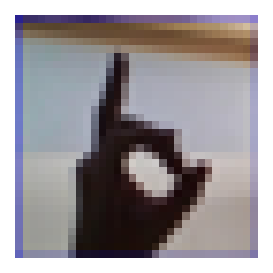

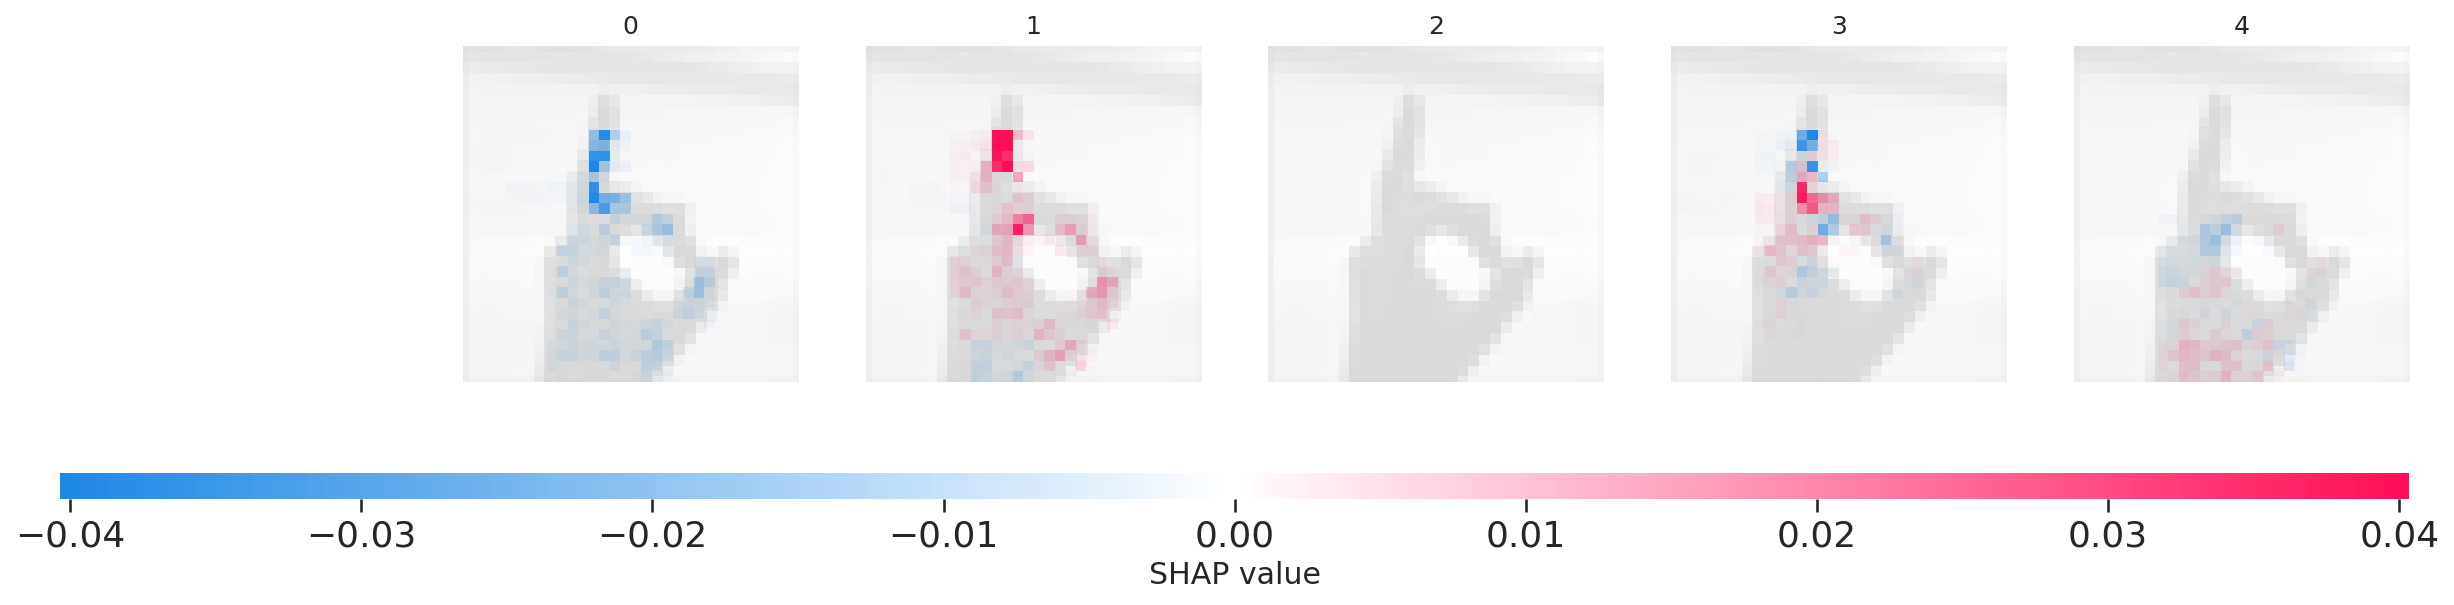

In [ ]:
import shap

# Function that wraps the model to make predictions for SHAP
def f(x):
    # The model function that simply takes in data and returns model predictions
    tmp = x.copy()  # Creating a copy of input to avoid changing the original
    return model(tmp)

# Step 1: Define the masker for image data (with a blur operation)
masker_blur = shap.maskers.Image("blur(32,32)", x_test[0].shape)  # Adjust the blur size if needed

# Step 2: Select the first image from x_test for SHAP evaluation
ind = [0]  # Use the first image (index 0) from x_test for SHAP computation

# Step 3: Ensure the image is in the correct range (pixel values between 0 and 255 or 0 and 1)
x_test_processed = x_test[ind]

# Print the image from `x_test_pict` (assuming it is the original image)
print("Displaying the image from x_test_pict at index", ind[0])

# Create a smaller figure size for displaying the image
plt.figure(figsize=(2, 2))  # Adjust the size to be smaller
plt.imshow(x_test_pict[ind[0]])  # Display the original image from x_test_pict
plt.axis('off')  # Turn off axis labels for cleaner display
plt.show()

# Step 4: Ensure x_test_processed is in the correct range
if x_test_processed.max() <= 255:
    # If the values are in the range of 0-255, clip them to this range
    x_test_processed = np.clip(x_test_processed, 0, 255)
elif x_test_processed.max() <= 1.0:
    # If the values are in the range of 0.0-1.0, clip them to this range
    x_test_processed = np.clip(x_test_processed, 0, 1)

# Step 5: Create a SHAP explainer object to compute SHAP values for the model
explainer = shap.Explainer(f, masker_blur, output_names=list(range(5)))  # Assuming 5 output classes

# Step 6: Calculate SHAP values using the original x_test data (from the selected image)
shap_values_ = explainer(x_test_processed, max_evals=5000, batch_size=50)

# Step 7: Visualize the SHAP values for the selected image
shap.image_plot(shap_values_[0], show=True)  # This will display the image and its SHAP values